<center>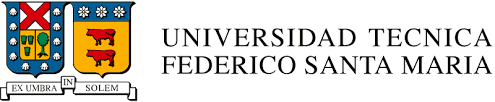</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Regularización
* SVM


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 1]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 12 de Mayo, en horario de clases.
* Fecha de entrega: 13 de Mayo. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

<hr style="height:2px;border:none"/>

Estudiantes a cargo del presente informe con sus respectivos roles USM:

- **Diego Astaburuaga: 202010018-7**

- **David Rivas:**

- **Dominique Yessouroun: 201910005-k**

<hr style="height:2px;border:none"/>

Se importan librerias necesarias para el proyecto.

In [722]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor # Regresores lineales
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif # Mutual information classification
import matplotlib.pyplot as plt
from matplotlib import dates as md

# Other libraries
from datetime import datetime #datetime structure
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 1. Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl

La regresión lineal es un modelo matemático que pertenece al aprendizaje supervisado, el cual intenta aplicar relaciones que predigan el resultado de un evento basándose en los datos de variables independientes. Llamaremos a este resultado: variable objetivo o _target_, y como es un modelo de regresión lineal la variable objetivo es una variable continua.

> En realidad es una variable discreta, pero se considera de esta manera dado que se abordará como un problema de regresión. Si se considera como uno de clasificación, la magnitud de clases (miles) para cada entero posible no es recomendable de trabajar por la cantidad de observaciones.

<center><img src=https://t4.ftcdn.net/jpg/02/32/47/13/360_F_232471334_vfDHKHeRHtwkn0zvd8SM98THwQeYDn8y.jpg></center>

Los sistemas de bicicletas compartidas son un medio para alquilar bicicletas en el que el proceso de afiliación, alquiler y devolución se automatiza a través de una red de _quioscos o puntos de estacionamiento_ repartidos por toda la ciudad. Gracias a estos sistemas, los usuarios pueden alquilar una bicicleta en un lugar y devolverla en otro cuando lo necesiten.

En esta pregunta se le proporcionan datos de alquiler de la cantidad de bicicletas arrendadas por hora durante dos años según variables climáticas y laborales.

> Más adelante se verifica que en realidad corresponden a 365 días repartidos entre los años 2017 y 2018.

Usted tiene separar el dataset en un conjunto de entrenamiento y en un conjunto de prueba, y el objetivo de esta pregunta será: **predecir el número total de bicicletas alquiladas en el conjunto de pruebas**.

La base de datos y toda la información asociada a esta se puede encontrar en el siguiente link: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Existen distintas formas para obtener los datos, de las cuales usted debe elegir solo uno:

1. Puede descargarlos y guardarlos en su directorio local y luego cargar los datos usando este notebook con Jupyter.

2. Puede utilizar google colab. En este caso existen 2 formas de cargar los datos, montando su cuenta de google drive en el colab y guardar los datos en una carpeta de drive. La otra forma es cargar los datos de forma en la máquiva virtual que le asigna colab de manera **temporal**. Tenga cuidado si elige la forma temporal ya que si por alguna razón se desconecta del ambiente, deberá volver a descargar los datos.

3. Existen muchas otras formas más pero usted puede obtener los datos con cualquier método que estime conveniente.


También es posible descargarlos mediante la [API](https://github.com/Kaggle/kaggle-api#kaggle-api) de Kaggle siguiendo las instrucciones en la sección API credentials. Si desea utilizar google colab puede seguir este tutorial [Kaggle + Colab](https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2)

> En este acercamiento se elije la opción de descargar directamente el conjunto de datos y cargarlo en el repositorio.

### 1.1.1 Exploración del conjunto de datos




In [723]:
# Data descargada en el repositorio
data_original = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

Observamos de manera general los primeros y últimos datos.

In [724]:
data_original.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [725]:
data_original.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


Explore el conjunto de datos y responda  brevemente las siguiente preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

> b) ¿Qué aspecto tienen en común las variables _Date_ y _Season_?

> c) Revise si faltan valores en los conjuntos de datos de prueba y de entrenamiento.

Para responder las preguntas se realizará un análisis exploratorio general a las variables y datos. Se responderán las preguntas de forma ordenada.

In [726]:
# Generic function that performs a brief diagnosis on a dataframe
def datainfo(df):
    temp_ps = pd.DataFrame(index = df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

# Shape of the data.
print("Total Rows and Columns in DataFrame is :", data_original.shape,"\n") 

# On the original dataframe 
info = datainfo(data_original)
info

Total Rows and Columns in DataFrame is : (8760, 14) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


In [727]:
# Selecting the numeric variables
numericas_int = list(info[info['DataType'] == 'int64'].index)
numericas_float = list(info[info['DataType'] == 'float64'].index)

print('a) Respuesta:\n Numeric variables:')
total_int = 1
for i,variable in enumerate(numericas_int):
    print(f'   {i+1}. (int) {variable}')
    total = i + 1
for i,variable in enumerate(numericas_float):
    print(f'   {total+i+1}. (float) {variable}')
print('\n')

# Selecting the categoric variables
categoricas = list(info[info['DataType'] == 'object'].index) 
print(' Categoric variables:')
for i,variable in enumerate(categoricas):
    print(f'   {i+1}. {variable}')

a) Respuesta:
 Numeric variables:
   1. (int) Rented Bike Count
   2. (int) Hour
   3. (int) Humidity(%)
   4. (int) Visibility (10m)
   5. (float) Temperature(°C)
   6. (float) Wind speed (m/s)
   7. (float) Dew point temperature(°C)
   8. (float) Solar Radiation (MJ/m2)
   9. (float) Rainfall(mm)
   10. (float) Snowfall (cm)


 Categoric variables:
   1. Date
   2. Seasons
   3. Holiday
   4. Functioning Day


b) `Respuesta`: Entre las variables "_Date_" y "_Season_" existe una relación de dependencia directa dado que las estaciones dependen del día y mes en el que nos encontremos. Se puede recuperar la variable "_Season_" a través de la variable "_Date_", pero no viceversa. Cabe destacar que "_Season_" se puede interpretar como una clasificación de "_Date_" por períodos. (Esto se verificará más adelante).

c) `Respuesta`: No faltarán valores en los conjuntos de datos de prueba y entrenamiento ya que el conjunto completo no posee valores NaN en ninguna de sus variables.

Revisemos que las observaciones están efectivamente registradas por hora sin haber valores faltantes.

In [728]:
dates = data_original['Date'].unique()

cant_complete_days = 0
incomplete_days = []
# Check day with data for any hour (0,1,...,23)
for date in dates:
    count = data_original[data_original['Date'] == date]['Hour'].value_counts()
    if len(count) == 24:
        cant_complete_days += 1
    else:
        incomplete_days.append(date)
print(f'days with 24 hour: {cant_complete_days}')
print(f'Incomplete days: {len(dates) - cant_complete_days}')
for date in incomplete_days:
    print(f'- {date}')

days with 24 hour: 365
Incomplete days: 0


Revisamos si las variables "Functioning Day", "_Holiday?" y "Season" son diarias, es decir, si es que no hay días 'mixtos' en su categoría de estas variables. Entendiendose como días 'mixtos' aquellos donde en un mismo día dadas distintas horas hay distintos valores para las variables anteriores.

In [729]:
dates = data_original['Date'].unique()

# Verify the last condition
for verify in ['Functioning Day', 'Holiday', 'Seasons']:
    print(f'Checking the completeness of "{verify}"')
    cant_complete = 0
    mixed = []
    for date in dates:
        count = data_original[data_original['Date'] == date][verify].value_counts()
        if len(count) == 1:
            cant_complete += 1
        else:
            # Same date in different hour have different value on feature
            mixed.append(date)
    print(f'Complete days: {cant_complete}')
    print(f'Mixed days: {len(dates) - cant_complete}')
    for date in mixed:
        print(f'- {date}')
    print('---------------------------------------------------')

Checking the completeness of "Functioning Day"
Complete days: 364
Mixed days: 1
- 06/10/2018
---------------------------------------------------
Checking the completeness of "Holiday"
Complete days: 365
Mixed days: 0
---------------------------------------------------
Checking the completeness of "Seasons"
Complete days: 365
Mixed days: 0
---------------------------------------------------


In [730]:
# Observe the unique mixed day
data_original[data_original['Date'] == '06/10/2018'][['Hour','Functioning Day']]

,Hour,Functioning Day
7416,0,No
7417,1,No
7418,2,No
7419,3,No
7420,4,No
7421,5,No
7422,6,No
7423,7,Yes
7424,8,Yes
7425,9,Yes


Lo anterior nos dice que todos los datos con la misma fecha poseen el mismo valor en "_Holiday_" y en "_Seasons_". Sin embargo, para "_Functioning Day_" existe un día mixto (06/10/2018), donde el servicio no estaba funcionando hasta las 7am.

> Se realizó una breve busqueda acerca de qué pudo ocurrir ese día y no se encontró nada significativo relevante al sistema de alquiler de bicicletas, salvo una noticia de Seúl en la cual se informa que el ex-presidente fue arrestado por corrupción el día 05/10/2018.

Dado esto, se puede reducir el dataframe a una observación por fecha sumando la variable "_Rented Bike Count_" y manteniendo la relación con la variable "_Holiday_" y "_Seasons_", pero no "_Functioning Day_". Exploremos más esta última variable.

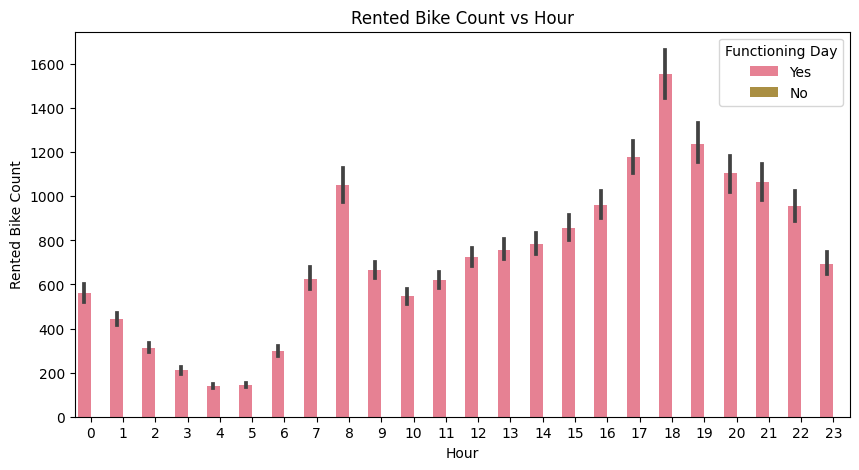

In [731]:
def barplots(x,y,hue):
    plt.figure(figsize=(10,5))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,hue=hue,data=data_original);
    plt.title("Rented Bike Count vs Hour")


barplots('Hour','Rented Bike Count','Functioning Day')

Notamos que existen 'peaks' en las horas 8 y 18, las que quizás podrían corresponder con el horario laboral de Séul durante la epoca en la cual se tomaron los datos.

Además, se observa que no existe representación de los casos cuando "_Functioning Day_" == "No", por lo que se infiere que en estos casos la variable "_Rented Bike Count_" debe ser 0. Para verificar esto se utiliza el siguiente código:

In [732]:
conteo = data_original['Functioning Day'].value_counts()
print(f'Functioning Day:')
print(f'{conteo}\n')

print('"Rented Bike Count" if "Functioning Day" == "No":')
print(data_original[data_original['Functioning Day'] == 'No']['Rented Bike Count'].value_counts())

Functioning Day:
Yes    8465
No      295
Name: Functioning Day, dtype: int64

"Rented Bike Count" if "Functioning Day" == "No":
0    295
Name: Rented Bike Count, dtype: int64


Con esto se obtiene que todos aquellos días donde "_Functioning Day_" == "No" no existe renta de bicicletas.

Veamos si todas las observaciones donde hay 0 arriendos son dado que "_Functioning Day_" == "No".

In [733]:
print('"Functioning Day" if "Rented Bike Count" == 0')
print(data_original[data_original['Rented Bike Count'] == 0]['Functioning Day'].value_counts())

"Functioning Day" if "Rented Bike Count" == 0
No    295
Name: Functioning Day, dtype: int64


Así, vemos que "_Rented Bike Count_" == 0 si y solo si "_Functioning Day_" == "No". Por lo tanto se afirma que esta columna es determinisitica, es decir que conociendo este único valor, se puede saber si las ventas son 0 o no.

><span style="color:red">Queda pendiente si trabajaremos con esta columna o no, en caso de no trabajar con esta, se puede utilizar la siguiente justificación.</span>
>
> Debido a esta carácteristica, se buscará entrenar un modelo que sólo trabaje con datos con "Functioning Day" == "Yes", con la salvedad de que se debe tener en cuenta de que si dicha carácteristica se tiene con valor "No", se debe asumir que la renta será 0. Esto tiene sentido dado que buscamos predecir la renta de bicícletas solamente en los días donde realmente se trabaja, ya que si el servicio no está activo es claro que no hay rentas (corroborado en los datos), de esta forma el modelo será más preciso al momento de predecir datos en los días de donde hay rentas ya que no se verá sesgado al tratar de predecir que "Rented Bike Count" == 0 si y solo si "Functioning Day" == "No", ya que esto lo hacemos de ante mano.

Teniendo esto en mente, se trabajará con esta columna sin alterar el dataframe, se deja como trabajo a futuro el eliminar esta columna y las observaciones pertinentes para trabajar sólo el caso de "Functioning Day" == "Yes". Se presenta en el siguiente bloque un código que permite hacer este procedimiento.

In [734]:
# Eliminar observaciones con "Functioning Day" == "No" (i.e. "Rented Bike Count" == 0)
# data = data_original.drop(data_original[data_original['Functioning Day'] == 'No'].index) 

# Eliminar columna "Functioning Day"
# data = data.drop(['Functioning Day'], axis = 1)

# Shape of the data.
#print("Total Rows and Columns in DataFrame is :", data.shape,"\n") 

#data.reset_index(drop=True, inplace=True)

#data.tail()

In [735]:
# Create a copy of the original dataframe to study and edit.
data = data_original.copy()

### 1.1.2 Exploración de Features

> a) Revise detalladamente las variables: 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count' del conjunto de datos cuente y grafique su histograma.

Una vez analizado lo anterior responda las siguientes preguntas:

> b) ¿La gente arrienda más bicicletas en vacaciones o en días de trabajo?

> c) ¿Se arriendan más bicicletas los fines de semana o durante la semana?

> d) ¿De qué forma afecta el clima al arriendo de bicicletas?

Para las preguntas b), c) y d) apóyese de los gráficos.

> Para responder a) se realiza un análisis descrito a continuación.

Creamos un dataframe con solo una observación por fecha, con la columna "_Rented Bike Count_" como la suma de todos los arriendos por hora en el día y las variables "_Holiday_" y "Season"

In [736]:
# Transform the object date to datetime
data['Date'] = pd.to_datetime(data_original['Date'], format='%d/%m/%Y')

# Auxiliar df to explore data
mini_data_diario = data.loc[:, ['Date','Rented Bike Count']].groupby(pd.Grouper(key='Date')).sum()
mini_data_diario = mini_data_diario.reset_index()
mini_data_diario.head()

holiday = []
season = []
# The holiday and season columns are added
for date in mini_data_diario['Date']:
    holiday.append(list(data[data['Date'] == date]['Holiday'])[0])
    season.append(list(data[data['Date'] == date]['Seasons'])[0])

mini_data_diario['Holiday'] = holiday
mini_data_diario['Seasons'] = season

# Shape of the data.
print("Total Rows and Columns in DataFrame is :", mini_data_diario.shape,"\n") 

mini_data_diario.head()

Total Rows and Columns in DataFrame is : (365, 4) 



,Date,Rented Bike Count,Holiday,Seasons
0,2017-12-01,9539,No Holiday,Winter
1,2017-12-02,8523,No Holiday,Winter
2,2017-12-03,7222,No Holiday,Winter
3,2017-12-04,8729,No Holiday,Winter
4,2017-12-05,8307,No Holiday,Winter


In [737]:
datainfo(mini_data_diario)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,datetime64[ns],365,365,0,0.0
Rented Bike Count,int64,365,353,0,0.0
Holiday,object,365,2,0,0.0
Seasons,object,365,4,0,0.0


De esta forma obtenemos un df que contiene la información para cada día lo que permite el estudio de las ventas por días sin importar las horas, lo que simplifica el calculo para evaluar cuantas bícicletas se venden según estas carácteristicas y luego calcular el promedio.

Dado que antes vimos que no existen datos mixtos excepto para la variable _Functioning Day_, se justifica agrupar todas las horas y sumar la cantidad de bicicletas en una misma observación por día manteniendo las variables de _Holiday_ y _Seasons_.

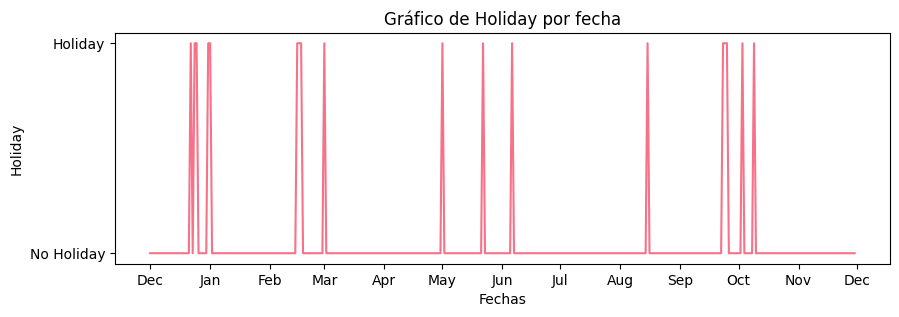

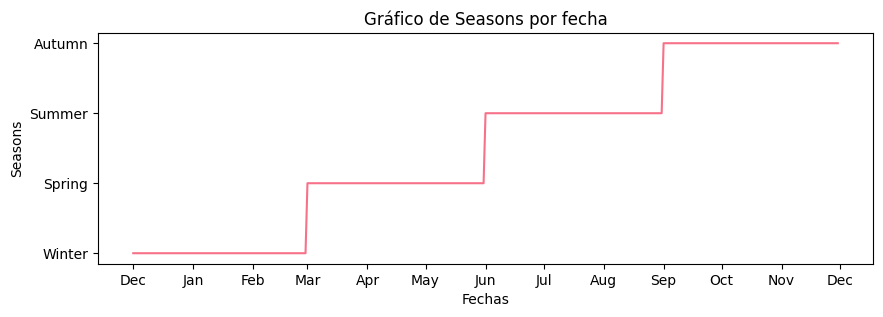

In [738]:
dates = mini_data_diario['Date'].unique()
# Graph of each distribution of the features Holiday and Seasons.
for verify in ['Holiday', 'Seasons']:
    verify_diario =[]
    for date in dates:
        verify_diario.append(list(mini_data_diario[mini_data_diario['Date'] == date][verify])[0])
        
    # Option of graphs    
    fig, ax=plt.subplots(1, 1, figsize=(10, 3))  
    ax.xaxis.set_major_locator(md.MonthLocator())
    ax.xaxis.set_major_formatter(md.DateFormatter('%b'))

    plt.plot(dates, verify_diario)
    plt.xlabel('Fechas')
    plt.ylabel(verify)
    plt.title(f'Gráfico de {verify} por fecha')
    plt.show()

Desde la distribución de "_Holiday_" == "Yes", deducimos que esta variable hace referencia a los días feriados; que son aislados. Además, notamos que la variable "_Season_" particiona 'continuamente' las fechas.

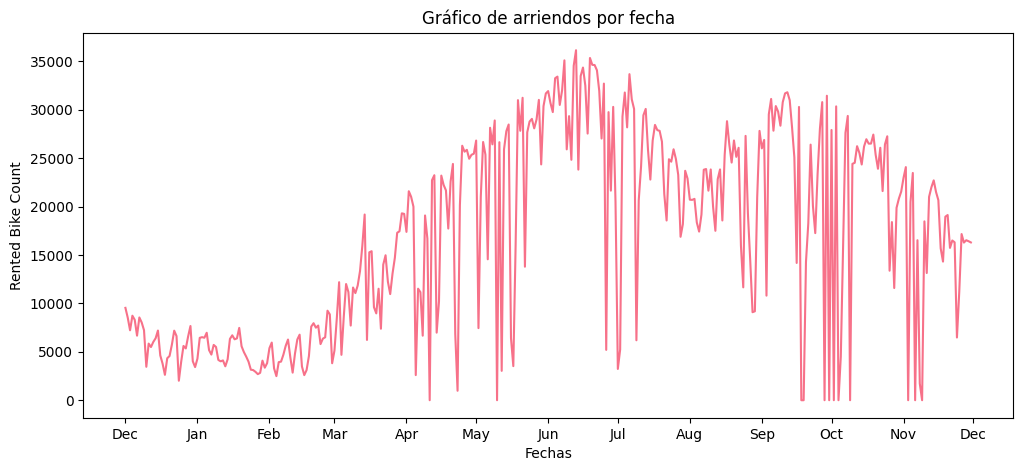

In [739]:
# Graph of the "Rented bike count" by date based on the mini_data_diario
fig, ax=plt.subplots(1, 1, figsize=(12, 5))  
ax.xaxis.set_major_locator(md.MonthLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))

plt.plot(mini_data_diario['Date'], mini_data_diario['Rented Bike Count'])
plt.xlabel('Fechas')
plt.ylabel("Rented Bike Count")
plt.title(f'Gráfico de arriendos por fecha')
plt.show()

Agregamos una columna a los dataframes con la variable "_Weekday_", que indica si la fecha corresponde a un día de semana o fin de semana.

In [740]:
# Agregar una columna que indica si la fecha corresponde a un día de la semana o un fin de semana
data['Weekday'] = data['Date'].dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'No Weekday')
mini_data_diario['Weekday'] = mini_data_diario['Date'].dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'No Weekday')

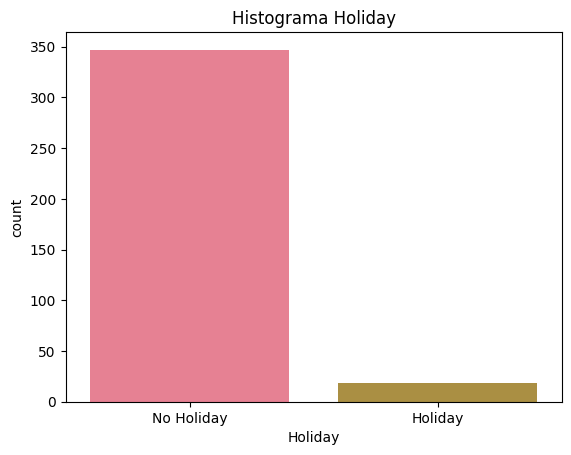

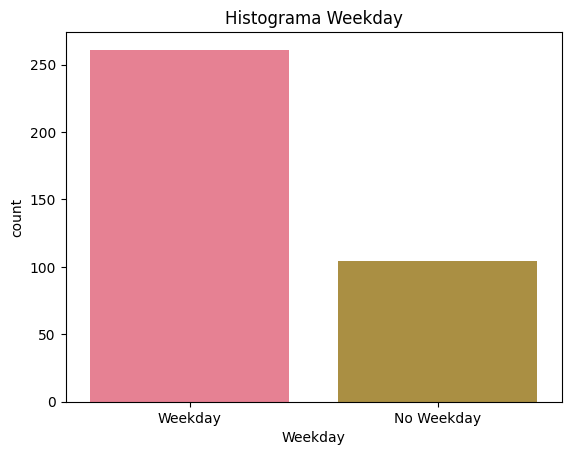

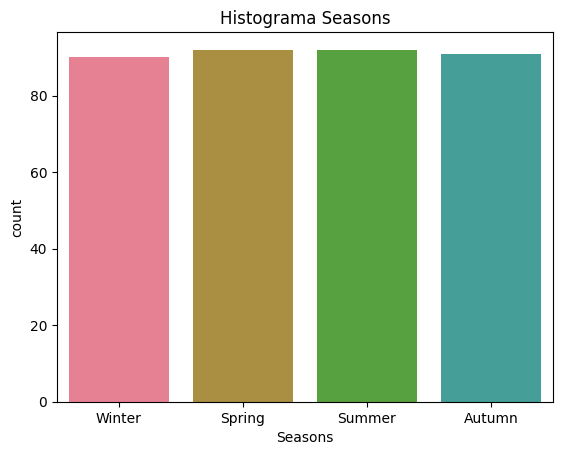

In [741]:
cat_features = ['Holiday', 'Weekday', 'Seasons']
for i in cat_features:
    sns.countplot(x = i, data=mini_data_diario)
    plt.title(f"Histograma {i}")
    plt.show()

De estos histogramas notamos el desbalance en las variables "Holiday" y "Weekday", donde claramente hay muchos más días no feriados.

In [742]:
# Sum of "_Rented bike count_" by feature Holiday.
sum_holiday = mini_data_diario.loc[:, ['Holiday','Rented Bike Count']].groupby(pd.Grouper(key='Holiday')).sum()
sum_holiday

,Rented Bike Count
Holiday,
No Holiday,5956419
Holiday,215895


In [743]:
# Sum of "_Rented bike count_" by feature Weekday.
sum_weekday = mini_data_diario.loc[:, ['Weekday','Rented Bike Count']].groupby(pd.Grouper(key='Weekday')).sum()
sum_weekday

,Rented Bike Count
Weekday,
Weekday,4506628
No Weekday,1665686


In [744]:
# Sum of "_Rented bike count_" by feature Seasons.
sum_seasons = mini_data_diario.loc[:, ['Seasons','Rented Bike Count']].groupby(pd.Grouper(key='Seasons')).sum()
sum_seasons

,Rented Bike Count
Seasons,
Winter,487169
Spring,1611909
Summer,2283234
Autumn,1790002


In [745]:
columns = ['feature','mean', 'std', 'max', 'min']
categories = []
list_stats = []

# Obtaining stats for each relevant possibility of feature
for verify in ['Holiday', 'Seasons','Weekday']:
    for cat in mini_data_diario[verify].unique():
        categories.append(cat)
        stats_cat = mini_data_diario[mini_data_diario[verify] == cat]['Rented Bike Count'].describe()
        stats = [round(x) for x in stats_cat[['mean', 'std', 'max', 'min']].values]
        list_stats.append(stats)

DATA2= pd.DataFrame(categories)
DATA3= pd.DataFrame(list_stats)
data_stats = pd.concat([DATA2,DATA3], axis=1)
data_stats.columns = columns
data_stats

,feature,mean,std,max,min
0,No Holiday,17165,10191,36149,0
1,Holiday,11994,10621,30498,0
2,Winter,5413,1808,9539,2014
3,Spring,17521,8672,31681,0
4,Summer,24818,7297,36149,3231
5,Autumn,19670,9398,31809,0
6,Weekday,17267,10359,36149,0
7,No Weekday,16016,9995,34360,0


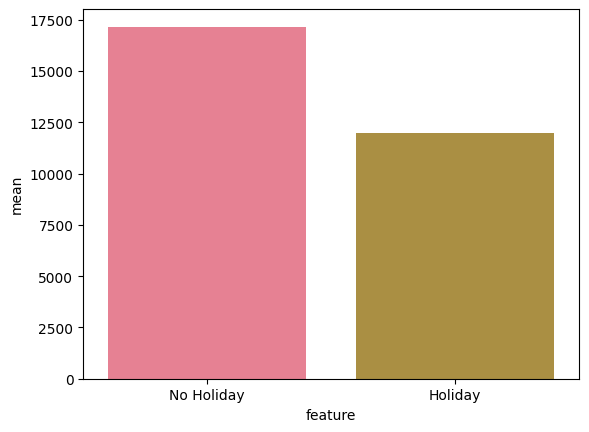

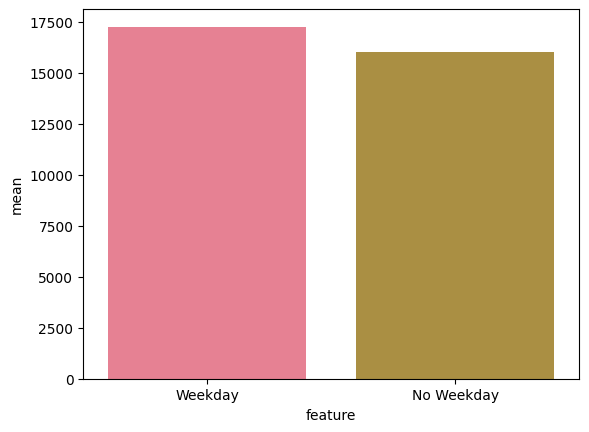

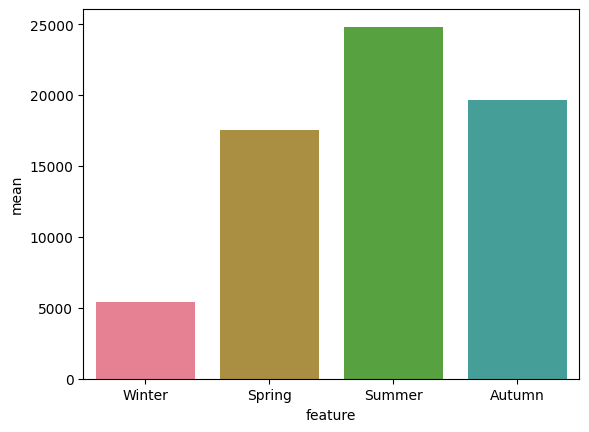

In [746]:
# Comparative graphs

sns.barplot(data=data_stats.iloc[[0,1],:], x='feature', y='mean')
plt.show()
sns.barplot(data=data_stats.iloc[[6,7],:], x='feature', y='mean')
plt.show()
sns.barplot(data=data_stats.iloc[[2,3,4,5],:], x='feature', y='mean')
plt.show()

In [747]:
# About Rented Bike Count
data_original['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

a) `Respuesta`: Para cada valor de "_Date_" existen 24 datos, uno correspondiente a cada hora del dia desde 0 a 23. Se mostró que tanto las variables "_Holiday_" y "_Seasons_" son únicas en relación a la variable "_Date_", es decir que para una misma fecha, estos features se mantienen estáticos, además se comprobó que "_Seasons_" corresponde a agrupaciones de fechas en bloques.

"_Date_" indica la fecha que va desde 01-12-2017 hasta 30-11-2018 siendo exactamente un año de datos. "_Holiday_" cuenta con dos posibles valores "_Holiday_" y "_No Holiday_" que indican si son días feriados o no. "_Seasons_" cuenta con cuatro posibles valores: "_Winter_", "_Spring_", "_Summer_", "_Autumn_" que corresponden a los meses de Invierno, Primavera, Verano y Otoño respectivamente. La variable "_Rented Bike Count_" es una variable entera que indica cuantas bicicletas se arrendaron en la fecha y hora indicadas con estádisticos básicos presentados anteriormente.


b) `Respuesta`: Si nos fijamos en la cantidad neta de bicicletas arrendadas durante vacaciones y días de trabajo, notamos que en los días de trabajo se arrendaron bastante más (casi el triple). Sin embargo, del histograma de la variable "_Holiday_", notamos una gran diferencia entre días de vacaciones y de trabajo, por lo que para realizar la justa comparación sobre cuándo la gente arrienda más bicicletas se calculó el promedio de arriendos por día para cada caso, obteniendo que en promedio hay un mayor arriendo en días de trabajo.

c) `Respuesta`: Si nos fijamos en la cantidad neta de bicicletas arrendadas, notamos que en los días de semana se arrendaron bastante más (casi el triple). Sin embargo, del histograma de la variable _Weekday_, notamos una gran diferencia entre días de vacaciones y de trabajo, por lo que para realizar la justa comparación sobre cuándo la gente arrienda más bicicletas se calculó el promedio de arriendos por día para cada caso, obteniendo que en promedio hay un mayor arriendo los días de semana.

d) `Respuesta`: <span style="color:red">Nota</span>: Dado el contexto del problema, se entiende por clima a la variable _Seasons_, aún cuando existen otras variables que se podrían relacionar al clima como _Temperature(°C)_ y _Humidity(%)_.

Si nos fijamos en la cantidad neta de bicicletas arrendadas, notamos que en verano se arrendaron más, le sigue otoño, bien de cerca sigue primavera y en invierno bajan considerablemente los arriendos. Al contrario de las variables anteriores, del histograma de la variable _Seasons_, casi no notamos diferencias entre las estaciones. Sin emabrgo, de todas maneras se calculó el promedio de arriendos por día para cada estación, obteniendo la misma secuencia de estaciones.
De lo anterior se concluye que la gente arrienda más bicicletas en climas cálidos.


> e) Grafique el promedio de bicicletas arrendadas por estación ('Seasons').

`Respuesta`: Ya se hizo.

Responda las siguientes preguntas:

> f) ¿Cuáles son las estaciones en las que más se arriendan bicicletas?

`Respuesta`: Ordenando de mayor a menor: Verano, Otoño, Primavera, Invierno.

> g) Transforme la fecha en variables numéricas, es decir, si _Date_ es 01/12/2017, entonces obtenga _Año_=2017, _mes_=12, _día_=1. Agreguelas al dataframe.

`Respuesta`: El siguiente código realiza lo pedido, entendiendo como _día_ a _dayofweek_ considerando lo siguiente que se pide.

In [748]:
# Transform of the variable Date to Year, Month and DayofWeek

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Dayofweek'] = data['Date'].dt.dayofweek  # 5 y 6 son weekend
data.drop('Date', axis=1, inplace=True)

data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday,Year,Month,Dayofweek
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Weekday,2017,12,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Weekday,2017,12,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Weekday,2017,12,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Weekday,2017,12,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Weekday,2017,12,4


> h) Grafique y analice de forma general la correlación entre las variables **numéricas**. 

In [749]:
info = datainfo(data)
info

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0
Snowfall (cm),float64,8760,51,0,0.0


**Correlation analysis:** Se recuerda que la correlación entre variables indica entre valores entre -1 a 1 el nivel de relación **lineal** entre las variables, -1 indica una relación lineal inversa perfecta (mientras una crece la otra decrece), 1 indica la relación lineal directa perfecta (si una crece la otra también) mientras que 0 indica la ausencia de relación directa, lo cual no quiere decir que no exista otro tipo de relación.

<AxesSubplot: >

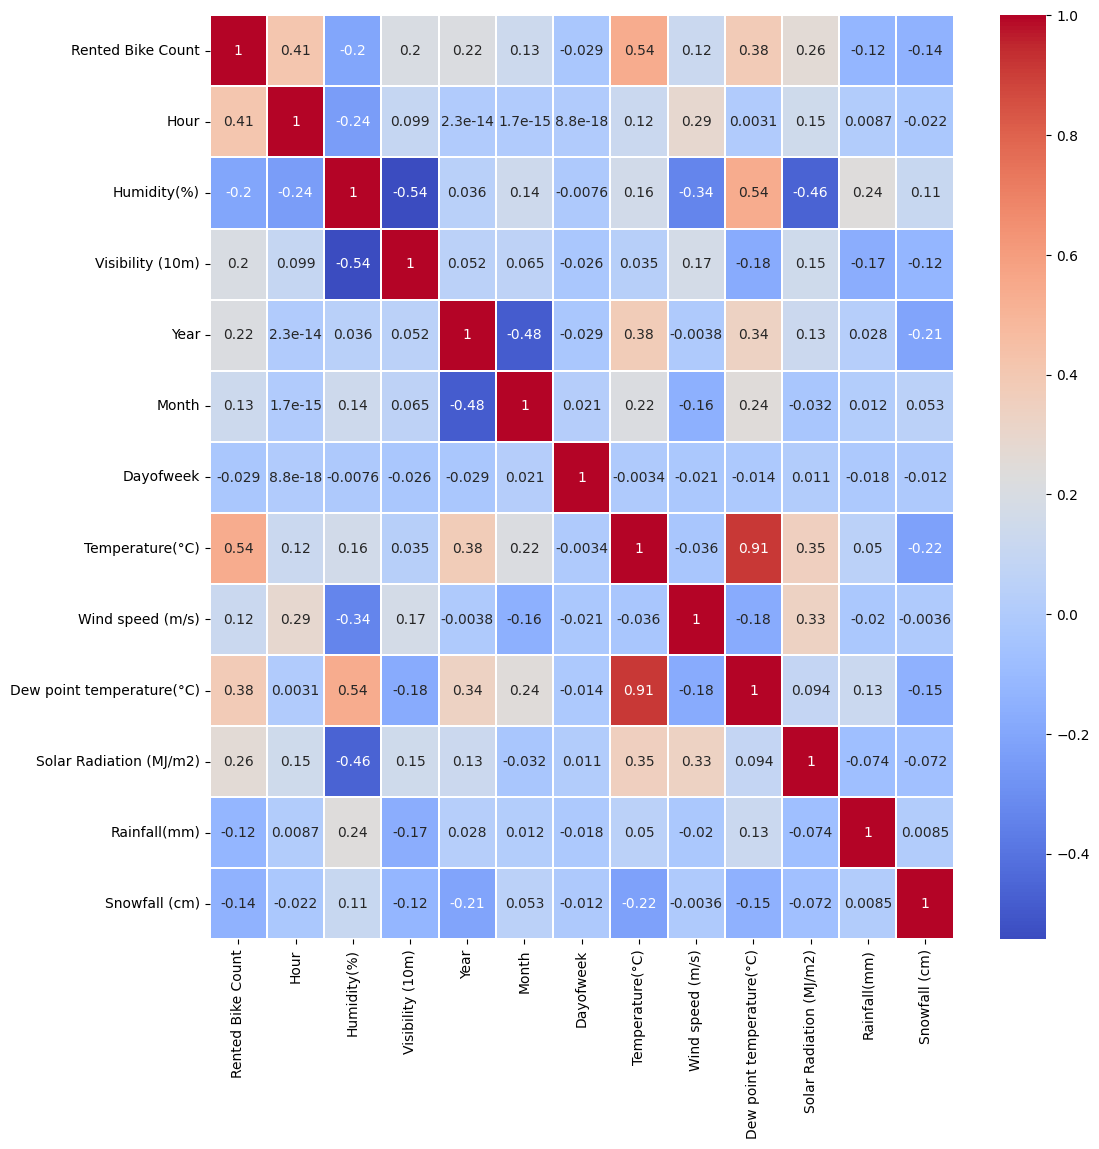

In [750]:
# Using the numerical values

numericas = list(info[info['DataType'] == 'int64'].index) + list(info[info['DataType'] == 'float64'].index)

data_corr= data[numericas].corr()       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

Ordenando en orden de mayor a valor en valor absoluto las correlaciones se presenta las primeras correlaciones más altas entre los features.

In [751]:
# List with all possible combination between variables
variable_combinations = [(i, j) for idx, i in enumerate(data_corr.columns) for j in data_corr.columns[idx+1:]]

# List with correlation between pairs
correlations = [data_corr.loc[i, j] for i, j in variable_combinations]

# Df with both information
new_df = pd.DataFrame({'Variable 1': [i for i, j in variable_combinations],
                       'Variable 2': [j for i, j in variable_combinations],
                       'Correlación': correlations})

# Sort df by absolute value
new_df = new_df.iloc[(-new_df['Correlación'].abs()).argsort()]

new_df.head(8)


,Variable 1,Variable 2,Correlación
64,Temperature(°C),Dew point temperature(°C),0.912798
23,Humidity(%),Visibility (10m),-0.543090
6,Rented Bike Count,Temperature(°C),0.538558
29,Humidity(%),Dew point temperature(°C),0.536894
42,Year,Month,-0.483684
30,Humidity(%),Solar Radiation (MJ/m2),-0.461919
0,Rented Bike Count,Hour,0.410257
8,Rented Bike Count,Dew point temperature(°C),0.379788


In [752]:
new_df[new_df['Variable 1'] == 'Rented Bike Count'].head()

,Variable 1,Variable 2,Correlación
6,Rented Bike Count,Temperature(°C),0.538558
0,Rented Bike Count,Hour,0.410257
8,Rented Bike Count,Dew point temperature(°C),0.379788
9,Rented Bike Count,Solar Radiation (MJ/m2),0.261837
3,Rented Bike Count,Year,0.215162


h) `Respuesta`: Notamos que las variables "_Temperature(°C)_" y "_Dew point temperature(°C)_" están altamente correlacionadas ($0.91$), seguidas por las variable "_Temperatura(°C)_" y nuestro target (_"Rented Bike Count"_) con $0.5$ app. Además existen otras variables medianamente correlacionadas como "_Humidity_(%)" con "_Visibility (10m)_" y "_Humidity(%)_" con "_Dew point temperature(°C)_". Se observa una correlación entre el mes y el año.

> i) Escriba sus conclusiones sobre los resultados encontrados en la correlación en la pregunta h)

i) `Conclusiones`: La alta correlación entre "_Temperature(°C)_" y "_Dew point temperature(°C)_" puede conducir a problemas de multicolinealidad y afectar la precisión y fiabilidad del modelo de regresión. Dado que la variable "_Temperatura(°C)_" está más correlacionada con nuestro target que "_Dew point temperature(°C)_", es que eliminamos la variable "_Dew point temperature(°C)_".

La última lista acerca de las correlaciones con "_Rented Bike Count_" entrega información valiosa y concuerda con lo que uno puede esperarse en la cotidianindad al menos de forma intuitiva. Esto falla en la correlación con la variable "_Year_", la cual se deduce que sólo se debe al período al cual pertenencen los datos.

Por otro lado, note que existe una correlación relativamente alta entre "_mounth_" y "_year_", la cual tiene que ver explicitamente con el período en el cual se tomarón los datos, donde todos los valores de Diciembre pertenecen a 2017 mientras que el resto de meses pertenecen a 2018.

In [753]:
# Eliminar "Dew point temperature(°C)"
data.drop(columns=['Dew point temperature(°C)'], inplace=True)

### 1.1.3 Separación de conjuntos

> a) Divida el dataset en features _X_ y target _y_, además divida el dataset en un subconjunto de entrenamiento y otro de prueba.

In [754]:
# a) Respuesta

X=data.drop('Rented Bike Count',axis=1)
y=data['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


> b) ¿Para qué es el parámetro stratify?

In [755]:
conteo = data['Rented Bike Count'].value_counts()

cant_total = 0
cant_ones = 0
cant_zeros = 0
for valor, frecuencia in conteo.items():
    cant_total += 1
    if frecuencia == 1:
        cant_ones += 1

print(f"Percentage of classes with one member: {round(cant_ones/cant_total,2)}")

Percentage of classes with one member: 0.27



b) `Respuesta`: Se utiliza para asegurarse de que la proporción de clases en el conjunto de datos original se mantenga en los subconjuntos de entrenamiento y prueba. Es útil cuando el conjunto de datos original está desequilibrado, es decir, hay una clase que tiene muchas más muestras que las demás. Esto ayuda a garantizar que el modelo entrenado en el subconjunto de entrenamiento sea capaz de generalizar bien a los datos no vistos del subconjunto de prueba.

No utilizamos esta función dado que queremos hacer regresión lineal, por lo que nuestro target se toma como variable continua, por lo que no hay clases que estratiificar.

Dado que alrededor de un cuarto de las clases tienen valores únicos, no tiene sentido utilizar "_Stratify_" para mantener las proporciones de las clases, por otro se deja como trabajo a futuro considerar la opción de agrupar las clases en conjuntos más grandes para evitar el problema de tener clases con pocos representantes. De esta forma se puede investigar si gracias a esto el modelo logra predecir de mejor forma identificando carácteristicas en común entre las clases.

> c) Aplique Label Encoding a las variables _Seasons_ y _Holiday_ en el conjunto de entrenamiento y responda para qué sirve y como se usa.

c) `Respuesta`: se utiliza para convertir variables categóricas en variables numéricas. Esta técnica asigna un número entero a cada categoría distinta de la variable categórica, de forma que las categorías similares tengan números similares. La función fit_transform() ajusta el encoder a los datos y transforma los datos categóricos en numéricos, mientras que transform() se utiliza para aplicar una transformación ya ajustada a un nuevo conjunto de datos, es decir, después de que el modelo se haya ajustado con fit_transform(), podemos aplicar la transformación ajustada a nuevos datos utilizando transform().

> d) Aplique la transformación aprendida por el Label Encoder al conjunto de prueba.

d) `Respuesta`: Se aplica mediante el siguiete código.

In [756]:
datainfo(X_train)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Hour,int64,7008,24,0,0.0
Temperature(°C),float64,7008,542,0,0.0
Humidity(%),int64,7008,90,0,0.0
Wind speed (m/s),float64,7008,64,0,0.0
Visibility (10m),int64,7008,1715,0,0.0
Solar Radiation (MJ/m2),float64,7008,341,0,0.0
Rainfall(mm),float64,7008,52,0,0.0
Snowfall (cm),float64,7008,49,0,0.0
Seasons,object,7008,4,0,0.0
Holiday,object,7008,2,0,0.0


La función LabelEnconder asigna números a los posibles valores en el orden que aparecen, cómo en el conjunto de entrenamiento los datos no están necesariamente ordenados, tampoco lo estan las épocas del año en el orden que deberían, por lo tanto se necesita hacer este proceso de forma manual para preservar el correcto orden para más adelante.

In [757]:
le = preprocessing.LabelEncoder()

# Applying Label Enconder over categoric variables

# For x, we expect to keep the order of Seasons.
le.fit(X_train["Seasons"])
le.classes_ = np.array(['Summer', 'Autumn', 'Winter', 'Spring'], dtype=object)
X_train["Seasons"] = le.transform(X_train["Seasons"])
X_test["Seasons"] = le.transform(X_test["Seasons"])

X_train["Holiday"] = le.fit_transform(X_train["Holiday"])
X_test["Holiday"] = le.transform(X_test["Holiday"])

X_train["Weekday"] = le.fit_transform(X_train["Weekday"])
X_test["Weekday"] = le.transform(X_test["Weekday"])

X_train["Functioning Day"] = le.fit_transform(X_train["Functioning Day"])
X_test["Functioning Day"] = le.transform(X_test["Functioning Day"])

X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday,Year,Month,Dayofweek
834,18,-2.6,38,1.4,1604,0.00,0.0,0.0,2,1,1,1,2018,1,3
5521,1,25.4,79,0.8,924,0.00,0.0,0.0,0,1,1,1,2018,7,3
119,23,-2.5,59,0.0,1210,0.00,0.0,0.0,2,1,1,1,2017,12,1
8129,17,16.9,33,2.2,1972,0.43,0.0,0.0,1,1,1,0,2018,11,6
402,18,-4.7,37,1.8,2000,0.01,0.0,0.0,2,1,1,0,2017,12,6


In [758]:
datainfo(X_train)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Hour,int64,7008,24,0,0.0
Temperature(°C),float64,7008,542,0,0.0
Humidity(%),int64,7008,90,0,0.0
Wind speed (m/s),float64,7008,64,0,0.0
Visibility (10m),int64,7008,1715,0,0.0
Solar Radiation (MJ/m2),float64,7008,341,0,0.0
Rainfall(mm),float64,7008,52,0,0.0
Snowfall (cm),float64,7008,49,0,0.0
Seasons,int32,7008,4,0,0.0
Holiday,int32,7008,2,0,0.0


> e) ¿Por qué no se aplica la transformación del Label Encoder directamente sobre el conjunto de datos completo?

e) `Respuesta`: Al aplicar Label Encoder sobre el conjunto de datos completo estaríamos introduciendo información de los datos de prueba en los datos de entrenamiento, lo que podría resultar en un sesgo en el modelo, causando que este no sea generalizable a datos nuevos.

## 1.2 Modelos de Regresión

Primero entrenaremos un regresor lineal con los datos _en bruto_, ya que básicamente se transformaron las variables _Date_, _Seasons_ y _Holiday_ tal que todos los datos se puedan procesar por el regresor.

### 1.2.1 Modelo en bruto

> a) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

a) `Respuesta`: Código

In [759]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

> b) Obtenga el error cuadrático medio de la predicción sobre los datos del conjunto *X_test*

b) `Respuesta`: Código

In [760]:
model_bruto_error = mean_squared_error(y_test, y_pred)
model_bruto_error

181452.6614996767

> c) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

c) `Respuesta`: Código

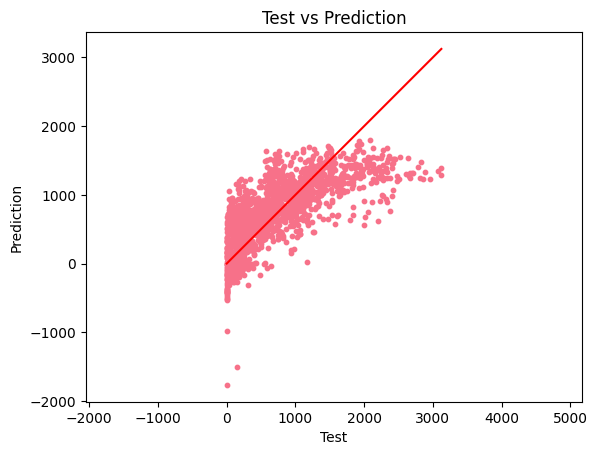

In [761]:
plt.scatter(y_test, y_pred, s=10)

# Recta identidad
x = [min(y_test), max(y_test)]
plt.plot(x, x, color='r')

# Configuraciones de eje y etiquetas
plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

### 1.2.2 Modelo preprocesado

Variables cíclicas

Si aplicaramos variables _Dummy_ o transformar con _One Hot Encoder_ a la fecha terminaríamos con 12 columnas para los meses, 7 columnas para los días de la semana y 24 columnas para la hora! En lugar de eso nos aprovecharemos de que todas estas variables son cíclicas, es decir, después de 23:00 hrs viene 00:00 hrs y el ciclo se vuelve a repetir, lo mismo para los meses del año y los días de la semana. Entonces podemos pensar en este ciclo como si fuera un _circulo_ utilizando el seno y el coseno de la fecha tenemos las coordenada de la fecha en el _circulo_. De esta forma las 23:00 y las 00:00 son cercanas en esta representación. Gracias a lo anterior nos quedamos con solo 2 columnas.

$\text{var}\_\text{cos} = \cos(2π\; \text{var}/\text{periodo})$

$\text{var}\_\text{sin} = \sin(2π\; \text{var}/\text{periodo})$

> a) ¿Por qué no simplemente usar solo el seno o solo el coseno?

<span style="color:red">ChatGPT</span>: La combinación de la función coseno y la función seno para representar las 24 horas del día, podemos expresar cualquier posición de la hora en relación con el ciclo completo de 24 horas.

demás, la combinación de la función coseno y la función seno nos permite representar la posición de la hora del día en un plano cartesiano, donde el eje horizontal representa la función coseno y el eje vertical representa la función seno

In [762]:
X_train['Hour_sin'] = np.sin(2 * np.pi * X_train['Hour'] / 24)
X_train['Hour_cos'] = np.cos(2 * np.pi * X_train['Hour'] / 24)
X_train['Month_sin'] = np.sin(2 * np.pi * X_train['Month'] / 12)
X_train['Month_cos'] = np.cos(2 * np.pi * X_train['Month'] / 12)
X_train['Dayofweek_sin'] = np.sin(2 * np.pi * X_train['Dayofweek'] / 7)
X_train['Dayofweek_cos'] = np.cos(2 * np.pi * X_train['Dayofweek'] / 7)

X_test['Hour_sin'] = np.sin(2 * np.pi * X_test['Hour'] / 24)
X_test['Hour_cos'] = np.cos(2 * np.pi * X_test['Hour'] / 24)
X_test['Month_sin'] = np.sin(2 * np.pi * X_test['Month'] / 12)
X_test['Month_cos'] = np.cos(2 * np.pi * X_test['Month'] / 12)
X_test['Dayofweek_sin'] = np.sin(2 * np.pi * X_test['Dayofweek'] / 7)
X_test['Dayofweek_cos'] = np.cos(2 * np.pi * X_test['Dayofweek'] / 7)

X_train.drop(['Month', 'Hour', 'Dayofweek'], axis=1, inplace=True)
X_test.drop(['Month', 'Hour', 'Dayofweek'], axis=1, inplace=True)

> b) Aplique la misma lógica de variable _cíclica_ a la variable _Season_.

b) `Respuesta`: Aplicando lo anterior para un cíclo de 4.

In [763]:
X_train['Season_sin'] = np.sin(2 * np.pi * X_train['Seasons'] / 4) 
X_train['Season_cos'] = np.cos(2 * np.pi * X_train['Seasons'] / 4)
X_train.drop('Seasons', axis=1, inplace=True)

X_test['Season_sin'] = np.sin(2 * np.pi * X_test['Seasons'] / 4) 
X_test['Season_cos'] = np.cos(2 * np.pi * X_test['Seasons'] / 4) 
X_test.drop('Seasons', axis=1, inplace=True)

Normalización de variables.

> c) Transforme las variables para que estas sigan una distribución normal con media 0 y varianza 1.

c) `Respuesta`: Estudiando que variables se deben normalizar, se seleccionan todas aquellas que no sean cíclicas.


In [764]:
datainfo(X_train)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Temperature(°C),float64,7008,542,0,0.0
Humidity(%),int64,7008,90,0,0.0
Wind speed (m/s),float64,7008,64,0,0.0
Visibility (10m),int64,7008,1715,0,0.0
Solar Radiation (MJ/m2),float64,7008,341,0,0.0
Rainfall(mm),float64,7008,52,0,0.0
Snowfall (cm),float64,7008,49,0,0.0
Holiday,int32,7008,2,0,0.0
Functioning Day,int32,7008,2,0,0.0
Weekday,int32,7008,2,0,0.0


In [765]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = X_train.columns.tolist()

X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize])
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])

In [766]:
X_test.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Weekday,Year,Hour_sin,Hour_cos,Month_sin,Month_cos,Dayofweek_sin,Dayofweek_cos,Season_sin,Season_cos
6829,1.070013,-0.901531,0.456283,0.923636,2.760066,-0.137593,-0.17644,0.227202,0.186680,0.634604,0.304039,-0.367323,-1.366034,-1.408696,0.004810,1.108049,0.889937,1.416694,-0.007704
4255,0.392125,-2.863348,-0.314416,-0.352402,-0.265585,-0.137593,-0.17644,0.227202,0.186680,-1.575786,0.304039,1.366008,-0.366770,0.711210,-1.220780,-1.103359,0.889937,-1.399016,-0.007704
7493,-0.176967,0.275558,-0.892440,0.928557,-0.655253,-0.137593,-0.17644,-4.401374,-5.356764,0.634604,0.304039,1.366008,0.364742,-1.219354,0.712405,1.108049,0.889937,1.416694,-0.007704
3589,0.751992,-1.539122,0.456283,-0.621387,3.184116,-0.137593,-0.17644,0.227202,0.186680,-1.575786,0.304039,-0.367323,-1.366034,1.228503,-0.702784,-1.103359,0.889937,-1.399016,-0.007704
6817,0.551136,-0.312986,-0.410753,0.928557,-0.655253,-0.137593,-0.17644,0.227202,0.186680,0.634604,0.304039,0.365269,1.364005,-1.408696,0.004810,1.108049,0.889937,1.416694,-0.007704


> d) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

d) `Respuesta`: Entrenando y obteniendo predicciones

In [767]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

> e) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

e) `Respuesta`: Obteniendo la predicción

In [768]:
y_pred = y_scaler.inverse_transform(y_pred)

> f) Calcule el error cuadrático medio en la escala original de bicicletas

f) `Respuesta`: Calculando el error

In [769]:
model_preprocess_error = mean_squared_error(y_test, y_pred)
model_preprocess_error

184502.57988090787

> g) ¿Mejoran los resultados con respecto al modelo entrenado sobre los datos en bruto?

In [770]:
improve_1 = (model_bruto_error-model_preprocess_error)/model_bruto_error
print("g) Respuesta:")
if improve_1>0:
    print(f"Hubo mejora dado que el modelo bajo el error cuadratico medio en: {improve_1}% respecto al modelo anterior")
else:
    print(f"No hubo mejora considerando el error cuadratico medio, el error aumenta en: {-improve_1}% respecto al  modelo anterior")

g) Respuesta:
No hubo mejora considerando el error cuadratico medio, el error aumenta en: 0.01680834194452751% respecto al  modelo anterior


> h) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

h) `Respuesta`: Gráficando

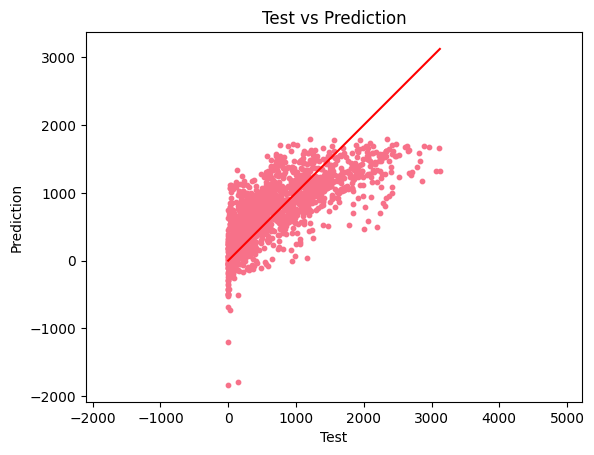

In [771]:
plt.scatter(y_test, y_pred, s=10)

# Recta identidad
x = [min(y_test), max(y_test)]
plt.plot(x, x, color='r')

# Configuraciones de eje y etiquetas
plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

### 1.2.3 Modelo SGD

En esta pregunta aplicaremos el modelo de regresión lineal utilizando el gradiente descendente estocástico (SGD), y para visualizar su rendimiento observaremos el error cuadrático medio a medida que el algoritmo SGD va iterando a través de las _epochs_. Para ello necesitamos separar una porción del conjunto de entrenamiento y así obtener el error de validación del modelo en ejemplos que no ha visto.

> a) Separe el conjunto de entrenamiento en un subconjunto de entrenamiento y uno de validación.

a) `Respuesta`: Separando el conjunto de entrenamiento en uno de entrenamiento y otro de validación utilizando train_test_split de forma conveniente:

In [772]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25)

Utilize la librería _sklearn_ para entrenar el modelo a través _SGDRegressor_ y responda las siguientes preguntas:

> b) ¿Para qué sirve cada uno de los parametros que acepta _SGDRegressor_? Describa brevemente cada uno.

b) `Respuesta`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
* **loss: str, default=’squared_error’.** Función de pérdida utilizada por el algoritmo para calcular el error entre las predicciones y los valores reales. Los valores permitidos son: 'squared_loss', 'huber', 'epsilon_insensitive' y 'squared_epsilon_insensitive'.

* **penalty: {‘l2’, ‘l1’, ‘elasticnet’, None}, default=’l2’.** Tipo de regularización a aplicar. Los valores permitidos son: 'l2' (ridge), 'l1' (lasso), 'elasticnet' (combinación de ridge y lasso).

* **alpha: float, default=0.0001.** Constante que multiplica el término de regularización.

* **l1_ratio: float (0,1), default=0.15.** El parámetro de combinación de Elastic Net mixing. Solo se usa si 'penalty' == 'elasticnet'.

* **fit_intercept: bool, default=True.** Si es que el intercepto debe ser estimado o no. Si no, se asume que la data ya está centrada.

* **max_iter: int, default=1000.** Número máximo de iteraciones permitidas.

* **tol: float or None, default=1e-3.** Tolerancia de convergencia. El algoritmo deja de iterar cuando la mejora de la función de pérdida es menor que tol.

* **shuffle: bool, default=True.** Si es True, los datos de entrenamiento se barajan antes de cada iteración.

* **verbose: int, default=0.** Si es mayor que 0, se muestra información sobre el progreso del entrenamiento.

* **epsilon: float, default=0.1.** Límite de sensibilidad para la función de pérdida 'huber', 'epsilon_insensitive' y 'squared_epsilon_insensitive'

* **random_state: int, RandomState instance, default=None.** Semilla aleatoria para la generación de números aleatorios.

* **learning_rate: str, default=’invscaling’.** Esquema de tasa de aprendizaje. Los valores permitidos son: 'constant', 'optimal', 'invscaling' y 'adaptive'.

* **eta0**: Tasa de aprendizaje inicial.

* **power_t: float, default=0.25.** Exponente para 'learning_rate' == 'invscaling'.

* **early_stopping: bool, default=False.** Detiene el entrenamiento antes de que el modelo alcance la convergencia si no hay mejora en la función de pérdida en un número determinado de iteraciones.

* **validation_fraction: float (0,1), default=0.1.** Proporción del training set para tomar como validation set para el early_stopping. Solo se usa si "early_stopping" == 'True'.

* **n_iter_no_change: int, default=5.** Número de iteraciones sin mejora a esperar antes del early stopping.

* **warm_start: bool, default=False.** Permite continuar entrenando el modelo desde donde se quedó en la última llamada a fit(), en lugar de empezar desde cero en cada iteración. Esto puede ser útil para mejorar la eficiencia del proceso de entrenamiento y mejorar la convergencia del modelo.

* **average: bool or int, default=False.** Indica si se debe calcular el promedio de los gradientes de cada iteración para actualizar los coeficientes del modelo. Si está establecido en True, se promedian los gradientes y se actualizan los coeficientes después de cada epoch, lo que puede mejorar la estabilidad del modelo.

> c) Explique cuál es la función del parámetro alpha y compare, teóricamente, las variaciones de implementación del parámetro disponibles en el módulo, es decir, compare: _constant_ vs _optimal_ vs _invscaling_ vs _adaptive_.

c) `Respuesta`: Un valor más alto de alpha resulta en una mayor regularización, lo que ayuda a prevenir el sobreajuste, pero también puede llevar a un sesgo elevado. Por otro lado, un valor más bajo de alpha resulta en una menor regularización y puede permitir un ajuste más preciso, pero también aumenta el riesgo de sobreajuste. 

* **"constant":** El valor de alpha se mantiene constante en todo el proceso de entrenamiento.
* **"optimal":** Se calcula automáticamente el valor óptimo de alpha para minimizar la función de pérdida, utilizando una fórmula empírica basada en la magnitud de los datos de entrenamiento.
* **"invscaling":** El valor de alpha disminuye gradualmente a medida que se realizan más iteraciones, según una función inversamente proporcional a la raíz cuadrada del número de iteraciones.
* **"adaptive":** El valor de alpha se ajusta automáticamente en función de la magnitud de las últimas iteraciones. Si la pérdida no disminuye durante un número determinado de iteraciones, se reduce el valor de alpha para reducir la velocidad de aprendizaje.

En general, la elección de la variante de alpha depende del problema y del conjunto de datos específicos. El valor "optimal" puede funcionar bien para conjuntos de datos pequeños, mientras que "adaptive" puede ser más útil para conjuntos de datos grandes y complejos. "Invscaling" puede ser útil para acelerar la convergencia al principio del entrenamiento, mientras que "constant" puede ser útil si se desea un control completo sobre el valor de alpha.

Se agrega que utilizando "constant" es posible que no haya convergencia debido a que el estimador puede oscilar en torno a la solución sin alcanzar ningún criterio de convergencia.

Entrene el regresor SGD por 100 _epochs_ como máximo, utilizando *early_stoping* con una paciencia de 10 _epochs_. Grafique el error cuadrático medio por epoca y responda las siguientes preguntas:

> d) ¿Para qué sirve el *early_stoping*?

d) `Respuesta`: Sirve para detener el modelo en caso de que no haya una mejore en el error cuadratico, es decir, que despues de 10 _epochs_ no haya una bajada en el error.

> e) ¿Cómo se interpretan los resultados del entrenamiento según las curvas obtenidas?

    

> f) ¿Cuántas _epochs_ duró su entrenamiento?

In [773]:
reg = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                        
                   warm_start=True,
                   #verbose=1,
                   )

y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors, val_errors = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

Stopping training after 29 epochs


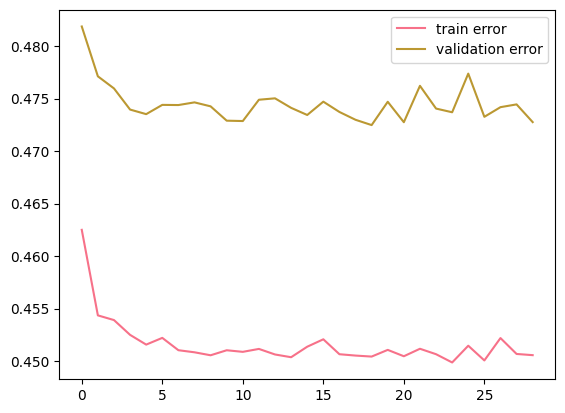

In [774]:
plt.plot(tr_errors, label='train error')
plt.plot(val_errors, label='validation error')
plt.legend()
plt.show()

e) `Respuesta`: Dada la aleatoriedad proveniente de utilizar SGD, existen casos donde la curva del error de validación queda por encima de la curva del error de entrenamiento y visceversa, también varía constantemente el número de epoch siendo un algoritmo poco estable en este sentido. Debido a que se espera que el error de entrenamiento sea menor al error de validación, se intuye que se deben realizar más iteraciones o aumentar la paciencia del modelo para lograr un ajuste deseado, esperando que este si disminuya el error en el conjunto de validación de manera más constante.

Ademas se observa que una vez el error de validación alcanza un mínimo, se sigue iterando hasta que luego de 10 epoch no hayan mejoras, siendo el modelo final el entregado en la última iteración.

f) `Respuesta`: El número de Epoch puede variar según se corra el código.

> g) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [775]:
y_pred = reg.predict(X_test).reshape(-1, 1)

In [776]:
y_pred = y_scaler.inverse_transform(y_pred)

g) `Respuesta`:

In [777]:
y_pred

array([[1162.11176859],
       [ 974.07539319],
       [-539.39837561],
       ...,
       [1243.18357309],
       [1410.53034966],
       [1228.98844775]])

> h) Calcule el error cuadrático medio en la escala original de bicicletas

h) `Respuesta`:

In [778]:
model_SGD_preprocess_error = mean_squared_error(y_test, y_pred)
model_SGD_preprocess_error

184849.04322297123

> i) ¿Mejoran los resultados con respecto al modelo anterior?

In [779]:
improve_2 = (model_preprocess_error-model_SGD_preprocess_error)/model_preprocess_error
print("i) Respuesta:")
if improve_2>0:
    print(f"Hubo mejora dado que el modelo bajó el error cuadratico medio en: {improve_2}% respecto al modelo anterior")
else:
    print(f"No hubo mejora considerando el error cuadratico medio, el error aumenta en: {-improve_2}% respecto al  modelo anterior")

i) Respuesta:
No hubo mejora considerando el error cuadratico medio, el error aumenta en: 0.0018778238346964895% respecto al  modelo anterior


> j) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

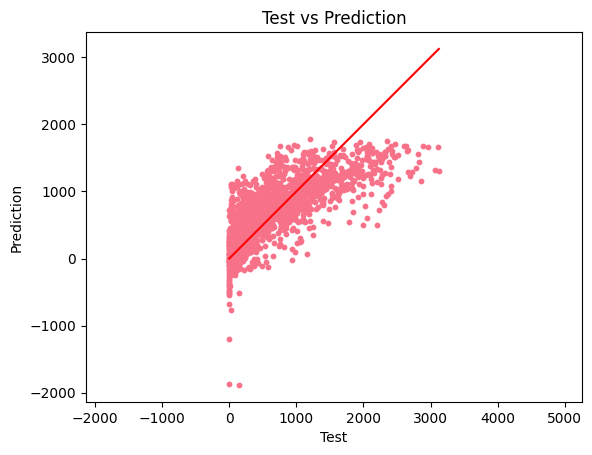

In [780]:
plt.scatter(y_test, y_pred, s=10)

# Recta identidad
x = [min(y_test), max(y_test)]
plt.plot(x, x, color='r')

# Configuraciones de eje y etiquetas
plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

In [781]:
reg = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                        
                   warm_start=True,
                   early_stopping=True,
                   max_iter=100,
                   n_iter_no_change=10
                   #verbose=1,
                   )

reg.fit(X_tr, y_tr)
y_pred = reg.predict(X_test).reshape(-1, 1)
y_pred = y_scaler.inverse_transform(y_pred)

model_SGD_preprocess_error = mean_squared_error(y_test, y_pred)

improve_2 = (model_preprocess_error-model_SGD_preprocess_error)/model_preprocess_error
print("i) Respuesta:")
if improve_2>0:
    print(f"Hubo mejora dado que el modelo bajó el error cuadratico medio en: {improve_2}% respecto al modelo anterior")
else:
    print(f"No hubo mejora considerando el error cuadratico medio, el error aumenta en: {-improve_2}% respecto al  modelo anterior")

i) Respuesta:
No hubo mejora considerando el error cuadratico medio, el error aumenta en: 0.009181191206466387% respecto al  modelo anterior


### 1.2.4 Análisis extendido y comprimido

Para buscar explorar otras opciones y hallar un error promedio que permita ver si realmente al cambiar de modelo existe una mejora o una bajada en el rendimiento al menos el promedio se realizará el mismo análisis anterior pero de forma más compacta.

**Creating data**

In [782]:
data = data_original.copy()

data['Date'] = pd.to_datetime(data_original['Date'], format='%d/%m/%Y')

# Agregar una columna que indica si la fecha corresponde a un día de la semana o un fin de semana
data['Weekday'] = data['Date'].dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'No Weekday')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Dayofweek'] = data['Date'].dt.dayofweek  # 5 y 6 son weekend

data.drop('Date', axis=1, inplace=True)

# Eliminar "Dew point temperature(°C)"
data.drop(columns=['Dew point temperature(°C)'], inplace=True) 

X=data.drop('Rented Bike Count',axis=1)
y=data['Rented Bike Count']

*Functions to compress code*

In [783]:
def Modelo_en_bruto(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    le = preprocessing.LabelEncoder()

    # Applying Label Enconder over categoric variables

    # For x, we expect to keep the order of Seasons.
    le.fit(X_train["Seasons"])
    le.classes_ = np.array(['Summer', 'Autumn', 'Winter', 'Spring'], dtype=object)
    X_train["Seasons"] = le.transform(X_train["Seasons"])
    X_test["Seasons"] = le.transform(X_test["Seasons"])

    X_train["Holiday"] = le.fit_transform(X_train["Holiday"])
    X_test["Holiday"] = le.transform(X_test["Holiday"])

    X_train["Weekday"] = le.fit_transform(X_train["Weekday"])
    X_test["Weekday"] = le.transform(X_test["Weekday"])

    X_train["Functioning Day"] = le.fit_transform(X_train["Functioning Day"])
    X_test["Functioning Day"] = le.transform(X_test["Functioning Day"])
    return X_train, X_test, y_train, y_test

def Modelo_preprocesado(X_train, X_test, y_train, y_test):
    X_train['Hour_sin'] = np.sin(2 * np.pi * X_train['Hour'] / 24)
    X_train['Hour_cos'] = np.cos(2 * np.pi * X_train['Hour'] / 24)
    X_train['Month_sin'] = np.sin(2 * np.pi * X_train['Month'] / 12)
    X_train['Month_cos'] = np.cos(2 * np.pi * X_train['Month'] / 12)
    X_train['Dayofweek_sin'] = np.sin(2 * np.pi * X_train['Dayofweek'] / 7)
    X_train['Dayofweek_cos'] = np.cos(2 * np.pi * X_train['Dayofweek'] / 7)

    X_test['Hour_sin'] = np.sin(2 * np.pi * X_test['Hour'] / 24)
    X_test['Hour_cos'] = np.cos(2 * np.pi * X_test['Hour'] / 24)
    X_test['Month_sin'] = np.sin(2 * np.pi * X_test['Month'] / 12)
    X_test['Month_cos'] = np.cos(2 * np.pi * X_test['Month'] / 12)
    X_test['Dayofweek_sin'] = np.sin(2 * np.pi * X_test['Dayofweek'] / 7)
    X_test['Dayofweek_cos'] = np.cos(2 * np.pi * X_test['Dayofweek'] / 7)

    X_train.drop(['Month', 'Hour', 'Dayofweek'], axis=1, inplace=True)
    X_test.drop(['Month', 'Hour', 'Dayofweek'], axis=1, inplace=True)
    
    X_train['Season_sin'] = np.sin(2 * np.pi * X_train['Seasons'] / 4) 
    X_train['Season_cos'] = np.cos(2 * np.pi * X_train['Seasons'] / 4)
    X_train.drop('Seasons', axis=1, inplace=True)

    X_test['Season_sin'] = np.sin(2 * np.pi * X_test['Seasons'] / 4) 
    X_test['Season_cos'] = np.cos(2 * np.pi * X_test['Seasons'] / 4) 
    X_test.drop('Seasons', axis=1, inplace=True)
    
    X_scaler = preprocessing.StandardScaler()
    y_scaler = preprocessing.StandardScaler()


    cols_to_normalize = X_train.columns.tolist()

    X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize])
    y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

    X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])
    return X_train, X_test, y_train, y_test

def Modelo_SGD(X_train, y_train, X_test, y_test):
    reg = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,
                   max_iter=100, # Epoch 
                   early_stopping = True, # Default False
                   n_iter_no_change=10, # Patience                                                  
                   warm_start=True,
                   average=True,
                   #verbose=1
                   )
    reg.fit(X_train, np.asarray(y_train).ravel())
    y_pred = y_scaler.inverse_transform(reg.predict(X_test).reshape(-1, 1))
    model_SGD_preprocess_error = mean_squared_error(np.asarray(y_test).ravel(), y_pred)
    return model_SGD_preprocess_error

In [784]:
k = 100 # Number to ponderate

error_bruto = 0
error_preprocesado = 0
error_SGD = 0

for i in range(k):
    # Modelo en bruto
    X_train, X_test, y_train, y_test = Modelo_en_bruto(X, y)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    error_bruto += mean_squared_error(y_test, y_pred)
    
    # Modelo preprocesado
    X_train, X_test, y_train, y_test = Modelo_preprocesado(X_train, X_test, y_train, y_test)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = y_scaler.inverse_transform(reg.predict(X_test))
    error_preprocesado += mean_squared_error(y_test, y_pred)
    
    # Modelo SGD
    error_SGD += Modelo_SGD(X_train, y_train, X_test, y_test)
    
# Ponderacion errores    
error_bruto /= k
error_preprocesado /= k
error_SGD /= k

print(f"Error bruto ponderado: {error_bruto}",
      f"\nError preprocesado ponderado: {error_preprocesado}",
      f"\nError SGD ponderado: {error_SGD}")

Error bruto ponderado: 190416.7738406997 
Error preprocesado ponderado: 191681.01470143083 
Error SGD ponderado: 191919.36672208816


Se observa que con cada modelo el error ponderado aumenta a medida se cambia el modelo.

## 1.3 Modelo con Regularización

### 1.3.1 Regularización Ridge y Lasso

Agregue regularización Ridge al modelo SGD y entrénelo por 100 _epochs_ como máximo, utilizando early_stoping con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por _epoch_ y responda las siguientes preguntas:

> a) ¿Qué son los llamados _hiperparámetros_ de un modelo y como se relacionan con el concepto de _hyper tuning_?

a) `Respuesta`: Los _hiperparámetros_ de un modelo son los parámetros propios de la forma del modelo que se deben ajustar mediante el proceso denominado _hyper tuning_, utilizando un ejemplo, _hiperparámetros_ pueden ser el tipo de penalización utilizada o el _learning rate_ asociado. Estos pueden ser seleccionados mediante técnicas como _K fold cross validation_ en la cual se prueban distintas combinaciones de _hiperparámetros_ y se selecciona la mejor según algún criterio.

> b) ¿Cuál es la motivación de agregar una penalización al modelo?

b) `Respuesta`: La motivación para agregar una penalización al modelo proviene de que esta sirve para reducir el riesgo de _overfitting_ en un modelo, con llevando un riesgo en el aumento del sesgo, por lo cual no siempre es buena idea introducir una penalización, para evaluar si se debe utilizar y cual, se evaluan en el proceso de _hyper tuning_.

> c) ¿De qué se compone la penalización mediante regularización Ridge?

c) `Respuesta`: Se compone de sumar una penalización al vector de parámetros de tipo $L^2$ lo cual al igual que la regularización Lasso induce un sesgo en el modelo a favor de reducir la complejidad buscando mejorar su capacidad de generalización...

> d) ¿Cómo funciona la regularización Lasso?

d) `Respuesta`: Añade una penalización utilizando la norma $L^1$ generando un problema de optimización con reestricciones que no posee solución explicita y que se debe resolver con Solver. Este funciona mediante reestringir el espacio posible de selección de parámetros y por su forma ocaciona que algunos coeficientes de ciertas variables se vuelvan 0 disminuyendo la complejidad y por ende el overfitting.. 

> e) ¿Cuáles son las ventajas y desventajas de usar regularización Ridge versus Lasso?

e) `Respuesta`: Una ventaja de la regresión Ridge, es que el vector de parametros optimo tiene formula explicita, lo que no se tiene para la regresión Lasso. Una ventaja de la regresión Lasso, es que al optimizar usualmente algunos coeficientes toman valor 0, lo cual puede ser útil para descartar features.

Una desventaja común de la regularización L2 es que puede no ser efectiva en la selección de características importantes cuando hay muchas características irrelevantes en el conjunto de datos. Por otro lado, una desventaja de la regularización L1 es que puede ser más sensible a los valores atípicos (outliers) que la regularización L2.

> f) Utilizando GridSearchCV optimize el hiperparámetro _learning rate_ para los valores 0.1, 0.01, 0.001.

f) `Respuesta`: Se presenta el desarrollo mediante código.

> g) Pruebe con distintos tipos de _learning rate_ 'constant', 'optimal', 'invscaling'.

g) `Respuesta`: Se realiza en el código.

> h) Optimize también los hiperparámetros de coeficiente de regularización de l2 y l1 para los valores 0.0001, 0.001, 0.01.

h) `Respuesta`: Se realiza en el código.

> **Nota:** Investigue y lea la documentación de SGDRegressor, de KFold y de GridSearchCV antes de modificar y ejecutar el código, recuerde que el código presentado en el notebook es solo una guía de referencia y no necesariamente funciona, usted puede modificar su propio código y explicar su funcionamiento.

Procesando la data nuevamente:

In [785]:
data = data_original.copy()

data['Date'] = pd.to_datetime(data_original['Date'], format='%d/%m/%Y')

# Agregar una columna que indica si la fecha corresponde a un día de la semana o un fin de semana
data['Weekday'] = data['Date'].dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'No Weekday')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Dayofweek'] = data['Date'].dt.dayofweek  # 5 y 6 son weekend

data.drop('Date', axis=1, inplace=True)

# Eliminar "Dew point temperature(°C)"
data.drop(columns=['Dew point temperature(°C)'], inplace=True) 

X=data.drop('Rented Bike Count',axis=1)
y=data['Rented Bike Count']

X_train, X_test, y_train, y_test = Modelo_en_bruto(X, y)
X_train, X_test, y_train, y_test = Modelo_preprocesado(X_train, X_test, y_train, y_test)

In [786]:
k=5
cv_folds=KFold(n_splits=k, shuffle=True)

In [787]:
reg = SGDRegressor(loss='squared_error', 
                   #penalty='l2', # regularization therm ridge
                   #alpha=0.0001, # regularization coeficient
                   max_iter=100, #epochs
                   early_stopping = True, # Default False
                   n_iter_no_change=10, # Patience
                   tol=0.001, 
                   shuffle=True,                                       
                   #learning_rate='invscaling', # type of lr
                   #eta0=0.01,    # learning rate coeficient
                   power_t=0.25
                   )

In [788]:
param_grid = {'eta0': [0.1, 0.01, 0.001], # Respuesta f) 
              'penalty': ['l2', 'l1'], # Respuesta h)
              'alpha': [0.0001, 0.001, 0.01], # Respuesta h)            
              'learning_rate': ['constant', 'optimal', 'invscaling']} # Respuesta g) 

hypereg = GridSearchCV(reg, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

In [789]:
hypereg.fit(X_train, np.asarray(y_train).ravel())

c:\Users\dyess\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\dyess\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\dyess\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\dyess\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SGDRegressor(early_stopping=True, max_iter=100,
                                    n_iter_no_change=10),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.1, 0.01, 0.001],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'penalty': ['l2', 'l1']},
             scoring='neg_mean_squared_error')

> i) Obtenga los resultados para cada hiperparámetro de la grilla.

In [790]:
pd.DataFrame(hypereg.cv_results_).sort_values(['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,0.030318,0.009925,0.003216,0.003940,0.001,0.01,invscaling,l2,"{'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'invscaling', 'penalty': 'l2'}",-4.811736e-01,-4.706023e-01,-4.841052e-01,-4.335145e-01,-4.656652e-01,-4.670122e-01,1.805281e-02,1
29,0.024340,0.004414,0.002170,0.003002,0.001,0.01,invscaling,l1,"{'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'invscaling', 'penalty': 'l1'}",-4.814422e-01,-4.729575e-01,-4.834191e-01,-4.299415e-01,-4.676719e-01,-4.670864e-01,1.942883e-02,2
12,0.020009,0.003311,0.002037,0.003304,0.0001,0.001,constant,l2,"{'alpha': 0.0001, 'eta0': 0.001, 'learning_rate': 'constant', 'penalty': 'l2'}",-4.805709e-01,-4.696592e-01,-4.857461e-01,-4.306581e-01,-4.691251e-01,-4.671519e-01,1.932768e-02,3
10,0.018592,0.003663,0.001392,0.000341,0.0001,0.01,invscaling,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'invscaling', 'penalty': 'l2'}",-4.824898e-01,-4.706086e-01,-4.877612e-01,-4.304722e-01,-4.683194e-01,-4.679303e-01,2.007824e-02,4
13,0.026976,0.008305,0.000520,0.000650,0.0001,0.001,constant,l1,"{'alpha': 0.0001, 'eta0': 0.001, 'learning_rate': 'constant', 'penalty': 'l1'}",-4.805276e-01,-4.737723e-01,-4.829755e-01,-4.331126e-01,-4.701651e-01,-4.681106e-01,1.809025e-02,5
46,0.013932,0.007948,0.003425,0.003789,0.01,0.01,invscaling,l2,"{'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'invscaling', 'penalty': 'l2'}",-4.827315e-01,-4.707635e-01,-4.867197e-01,-4.330494e-01,-4.682145e-01,-4.682957e-01,1.895380e-02,6
48,0.013829,0.006445,0.000000,0.000000,0.01,0.001,constant,l2,"{'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant', 'penalty': 'l2'}",-4.841129e-01,-4.752127e-01,-4.892207e-01,-4.297270e-01,-4.663344e-01,-4.689215e-01,2.109653e-02,7
11,0.027013,0.005337,0.000000,0.000000,0.0001,0.01,invscaling,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'invscaling', 'penalty': 'l1'}",-4.847403e-01,-4.751435e-01,-4.834701e-01,-4.336907e-01,-4.682057e-01,-4.690501e-01,1.866680e-02,8
30,0.020274,0.005086,0.002035,0.003691,0.001,0.001,constant,l2,"{'alpha': 0.001, 'eta0': 0.001, 'learning_rate': 'constant', 'penalty': 'l2'}",-4.910122e-01,-4.711304e-01,-4.860534e-01,-4.314858e-01,-4.689542e-01,-4.697272e-01,2.090246e-02,9
47,0.036656,0.010129,0.001107,0.000597,0.01,0.01,invscaling,l1,"{'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'invscaling', 'penalty': 'l1'}",-4.895359e-01,-4.766668e-01,-4.841529e-01,-4.303424e-01,-4.717607e-01,-4.704917e-01,2.098103e-02,10


In [792]:
best_params = hypereg.cv_results_['params'][hypereg.cv_results_['rank_test_score'][0]]
best_params

IndexError: list index out of range

In [ ]:
print(f"Respuesta f): El valor optimizado para _eta0_ es: {best_params['eta0']}")
print(f"Respuesta g): Learning rate seleccionado: {best_params['learning_rate']}")
print(f"Respuesta h): Regularización seleccionada {best_params['penalty']} con factor alpha={best_params['alpha']}")

Respuesta f): El valor optimizado para _eta0_ es: 0.001
Respuesta g): Learning rate seleccionado: invscaling
Respuesta h): Regularización seleccionada l2 con factor alpha=0.01


> j) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [ ]:
y_pred = hypereg.predict(X_test).reshape(-1, 1)

y_pred = y_scaler.inverse_transform(y_pred)

> k) Calcule el error cuadrático medio en la escala original de bicicletas

In [ ]:
model_Regularization_error = mean_squared_error(y_test, y_pred)
model_Regularization_error

191324.9315334977

> l) ¿Mejoran los resultados con respecto a los modelo anteriores?

In [ ]:
improve_3 = (model_SGD_preprocess_error-model_Regularization_error)/model_SGD_preprocess_error
print("l) Respuesta:")
if improve_3>0:
    print(f"Hubo mejora dado que el modelo bajó el error cuadratico medio en: {improve_3}% respecto al modelo anterior")
else:
    print(f"No hubo mejora considerando el error cuadratico medio, el error aumenta en: {improve_3}% respecto al  modelo anterior")

l) Respuesta:
No hubo mejora considerando el error cuadratico medio, el error aumenta en: -0.0031810507839709016% respecto al  modelo anterior


> m) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

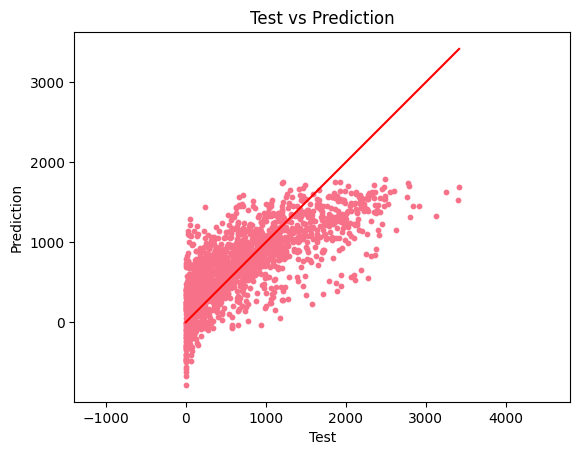

In [ ]:
plt.scatter(y_test, y_pred, s=10)

# Recta identidad
x = [min(y_test), max(y_test)]
plt.plot(x, x, color='r')

# Configuraciones de eje y etiquetas
plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.4 Conclusiones:

(Escriba aquí sus conclusiones de la pregunta 1: Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl)

# 2. Clasificación de hongos





La tarea de clasificación se refiere a un problema en el que se tiene un conjunto de datos y se quiere predecir la clase a la que pertenece cada elemento del conjunto de datos.

Para hacer esto, utilizaríamos un algoritmo de clasificación que examina las características de cada fruta en el conjunto de datos y aprende patrones que pueden ser utilizados para predecir su clase.

Hay muchos algoritmos de clasificación diferentes que se pueden utilizar en el aprendizaje automático, por ejemplo la regresión logística, el SVM (máquina de soporte vectorial), Random Forest y redes neuronales, etcétera.

Una vez que se entrena el modelo, se utiliza para predecir la clase de nuevos datos que no se incluyeron en el conjunto de datos original. Para medir el desempeño del modelo, se pueden utilizar diferentes métricas de evaluación, como la precisión, el recall y la F1-score.

La tarea de clasificación es muy útil en muchas áreas, como la medicina, la banca, el comercio electrónico y la publicidad, ya que permite la automatización de tareas que antes requerían una gran cantidad de tiempo y recursos humanos.

<center><img src=https://w0.peakpx.com/wallpaper/496/595/HD-wallpaper-red-mushroom-mushroom-red-beautiful.jpg></center>

Este conjunto de datos incluye descripciones de muestras correspondientes a 23 especies de hongos de la familia Agaricus y Hongo Lepiota extraídas de la Guía de campo de hongos norteamericanos de la Audubon Society. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se ha combinado con la venenosa.

## 2.1 Manipulación y exploración del conjunto de datos

In [891]:
data_mush = pd.read_csv('mushrooms.csv')

In [892]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :", data_mush.shape,"\n") 

data_mush.head()

Total Rows and Columns in DataFrame is : (8124, 23) 



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [893]:
def datainfo():
    temp_ps = pd.DataFrame(index=data_mush.columns)
    temp_ps['DataType'] = data_mush.dtypes
    temp_ps["Non-null_Values"] = data_mush.count()
    temp_ps['Unique_Values'] = data_mush.nunique()
    temp_ps['NaN_Values'] = data_mush.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data_mush))*100 
    return temp_ps

info = datainfo()
info

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
class,object,8124,2,0,0.0
cap-shape,object,8124,6,0,0.0
cap-surface,object,8124,4,0,0.0
cap-color,object,8124,10,0,0.0
bruises,object,8124,2,0,0.0
odor,object,8124,9,0,0.0
gill-attachment,object,8124,2,0,0.0
gill-spacing,object,8124,2,0,0.0
gill-size,object,8124,2,0,0.0
gill-color,object,8124,12,0,0.0


Notamos que no faltan datos y que no hay incongruencias en ellos (no hay NaN). Además, todas las columnas presentes en la data son variables categóricas y estamos en presencia de 6 variables binarias, donde una de ellas es nuestro taget '_class_'.

### 2.1.1 Exploración de features

> a) ¿Por qué la variable _veil-type_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.

a) `Respuesta`: Porque toma un único valor, es decir, es constante, por lo que no aporta nada al momento clasificar.

<AxesSubplot: xlabel='veil-type', ylabel='count'>

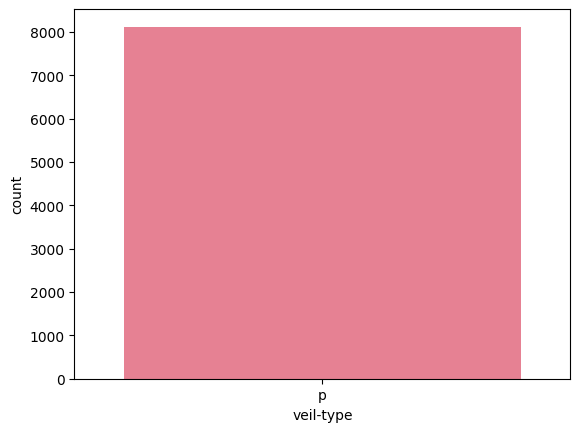

In [894]:
sns.countplot(x="veil-type", data=data_mush)

In [895]:
data_mush.drop('veil-type', axis=1, inplace=True)
data_mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g


> b) Grafique la distribución de cada variable

c:\Users\dyess\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


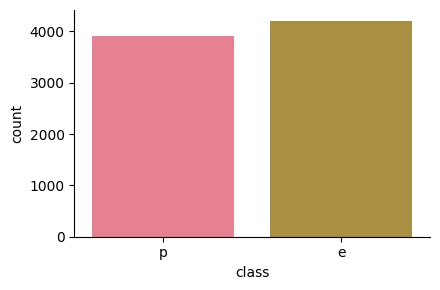

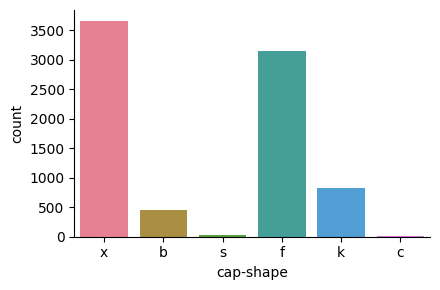

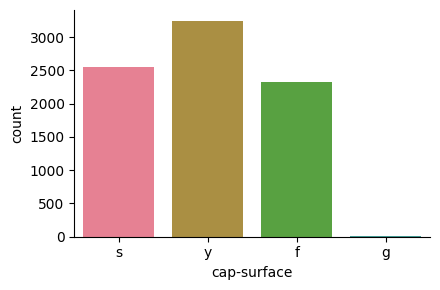

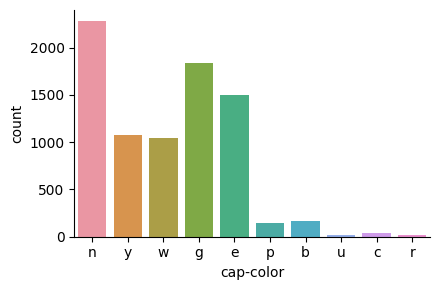

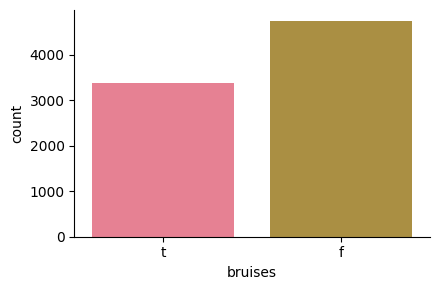

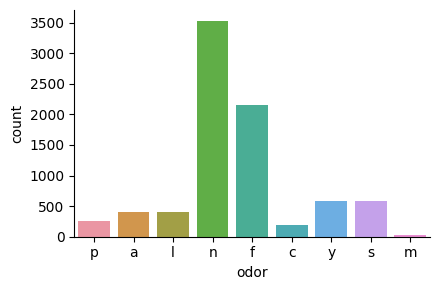

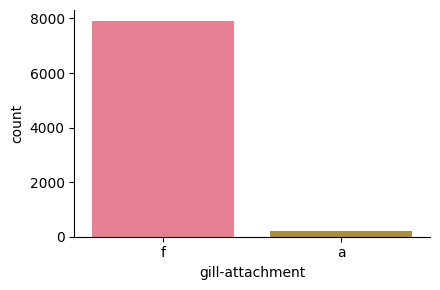

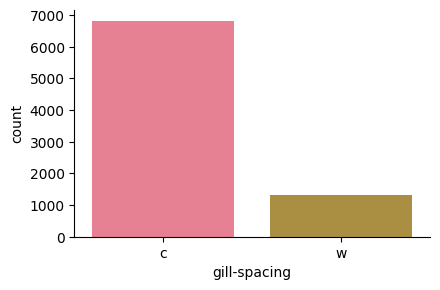

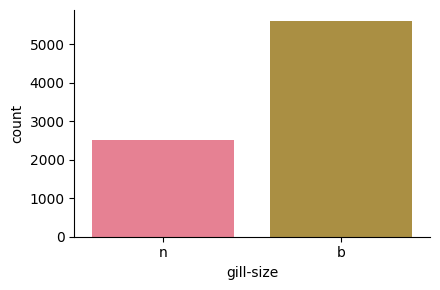

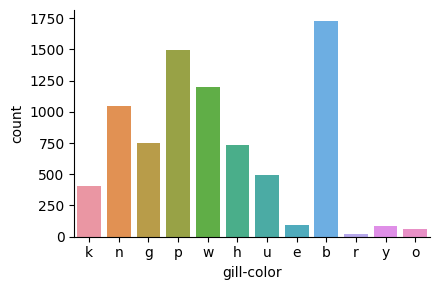

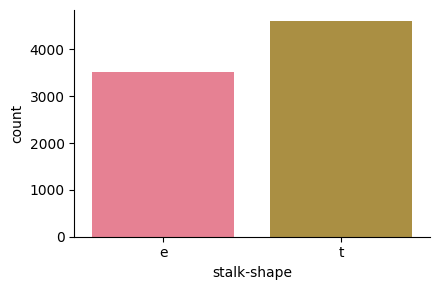

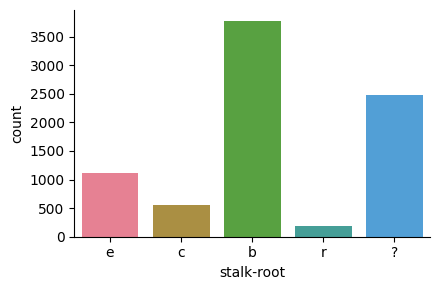

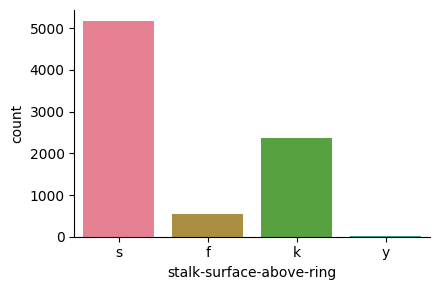

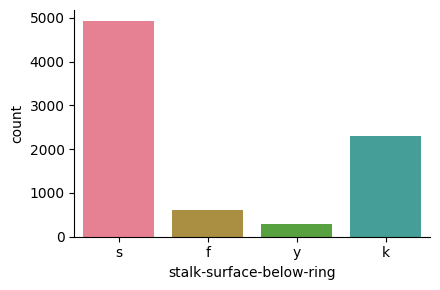

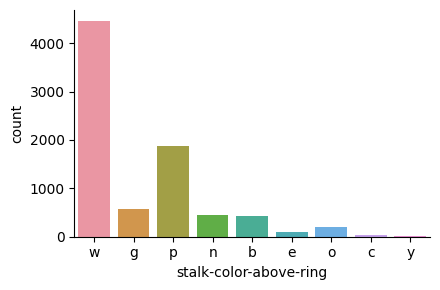

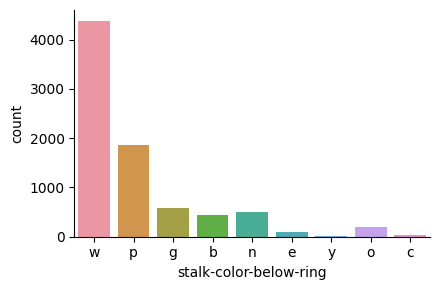

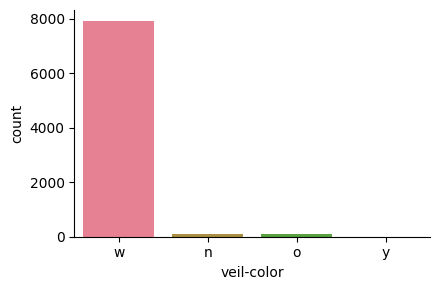

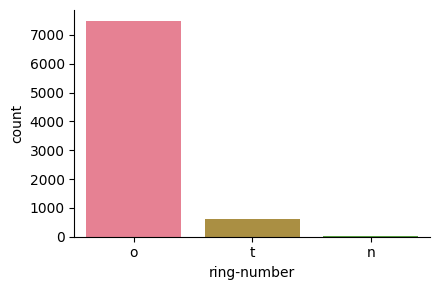

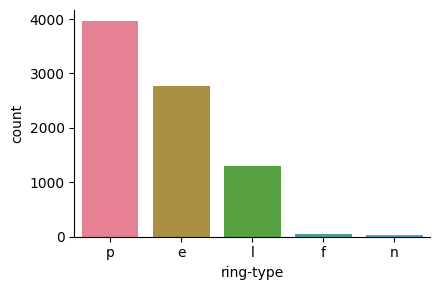

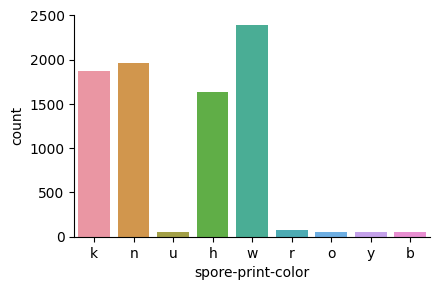

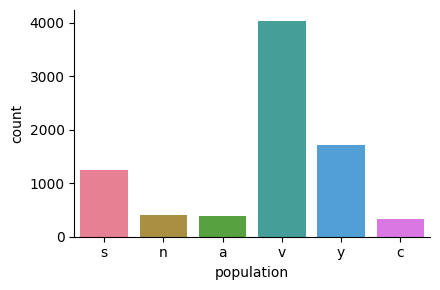

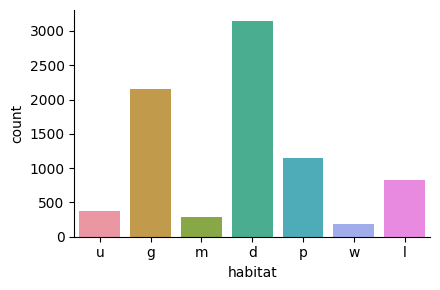

In [896]:
for col in data_mush.columns:    
    sns.catplot(x=col, kind="count", data=data_mush, height=3, aspect=1.5)

> c) Separe el conjunto de datos en los subconjuntos de entrenamiento y prueba.

In [897]:
train_set, test_set = train_test_split(data_mush, test_size=0.2, shuffle=True, stratify=None)

# Shape of the data.
print("Total Rows and Columns in train set is :", train_set.shape) 
print("Total Rows and Columns in test set is :", test_set.shape) 

train_set.head()

Total Rows and Columns in train set is : (6499, 22)
Total Rows and Columns in test set is : (1625, 22)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5614,p,x,y,n,f,s,f,c,n,b,t,?,k,s,w,p,w,o,e,w,v,l
2281,e,x,y,n,t,n,f,c,b,u,t,b,s,s,p,g,w,o,p,n,y,d
4783,e,f,f,e,t,n,f,c,b,p,t,b,s,s,p,p,w,o,p,n,y,d
5854,p,x,y,n,f,f,f,c,n,b,t,?,s,k,p,w,w,o,e,w,v,d
3922,e,f,f,e,t,n,f,c,b,n,t,b,s,s,g,w,w,o,p,k,v,d


> d) Codifique las variables de entrada para que puedan ser trabajadas en las siguientes preguntas.

Puesto que todas las variables son categóricas, debemos codificarlas todas.

In [898]:
# create a list to store the columns to be dropped
drop_cols = []
data_again = pd.concat([train_set, test_set])

# iterate over columns and check for binary variables
for col in data_again.columns:
    if len(data_again[col].unique()) == 2:
        # convert binary variables to 0/1
        if col == 'class':
            # mapear 'e' a 0 y 'p' a 1
            data_again[col] = data_again[col].replace({'e': 0, 'p': 1})
        else:
            data_again[col] = pd.factorize(data_again[col])[0]
    else:
        # get dummies for categorical variables with more than 2 categories
        data_again = pd.concat([data_again, pd.get_dummies(data_again[col], prefix=col)], axis=1)
        # add the original column to the list of columns to be dropped
        drop_cols.append(col)

# drop the original categorical columns from the train and test sets
data_again.drop(drop_cols, axis=1, inplace=True)

train_set = data_again.iloc[:train_set.shape[0], :]
test_set = data_again.iloc[-test_set.shape[0]:, :]

# print the shapes of the train and test sets
print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)

train_set.head()

Train set shape: (6499, 112)
Test set shape: (1625, 112)


,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
5614,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2281,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4783,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
5854,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3922,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


> e) Separe los subconjuntos en _X_ e _y_

In [899]:
X_train = train_set.drop('class',axis=1)
y_train = train_set['class']

X_test = test_set.drop('class',axis=1)
y_test = test_set['class']

In [900]:
# Shape of the data.
print("Total Rows and Columns in X_train is :", X_train.shape) 
print("Total Rows and Columns in y_train is :", y_train.shape,"\n") 

X_train.head()

Total Rows and Columns in X_train is : (6499, 111)
Total Rows and Columns in y_train is : (6499,) 



,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
5614,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2281,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4783,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
5854,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3922,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


### 2.1.2 Principal Component Analisis

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad comúnmente usada en machine learning para reducir el número de características en el conjunto de datos conservando la información más importante.

> a) Aplique PCA a los datos preprocesados para reducir el número de características a un conjunto más pequeño de componentes principales que capturen los patrones más importantes de los datos. Pruebe con n_components = n_features - k, donde k={1,10,50}, es decir, cree 3 posibles transformaciones de "*X_train*" y apliquelas sobre "*X_test*".

**Nota:** En adelante se le llamará "representación de los datos" a las distintas _feature selection/extraction_, por ejemplo: una posible representación de los datos es aplicar PCA con las 80 componentes principales.

In [901]:
n_features = X_train.shape[1]

#----------Con k=1

pca = PCA(n_components =  n_features-1)
pca.fit(X_train)

X_train_pca_1 = pca.transform(X_train)
X_test_pca_1 = pca.transform(X_test)

#----------Ahora con k=10

pca = PCA(n_components=  n_features-10)
pca.fit(X_train)

X_train_pca_10 = pca.transform(X_train)
X_test_pca_10 = pca.transform(X_test)

#----------Ahora con k=50

pca = PCA(n_components=  n_features-50)
pca.fit(X_train)

X_train_pca_50 = pca.transform(X_train)
X_test_pca_50 = pca.transform(X_test)

### 2.1.3 Mutual Information

La información mutua es una medida de dependencia entre variables, se puede usar para medir el grado de asociación entre las _features_ y el _target_, y usar esta información para seleccionar las _features_ más relevantes para posteriormente realizar la clasificación. Al utilizar la información mutua para seleccionar las características más informativas, puede mejorar potencialmente el rendimiento de su modelo de aprendizaje automático reduciendo la cantidad de información irrelevante o redundante en el conjunto de datos.

> a) Calcule la información mutua entre cada característica y la variable objetivo (comestible o venenoso) para medir el grado de asociación entre cada característica y la variable objetivo.

> b) Seleccione las n características con las puntuaciones de información mutua más altas como entrada para un modelo de aprendizaje automático. Pruebe con n = n_features - k, para k={1,10,50}, es decir, cree 3 posibles transformaciones de "X_train" y apliquelas sobre "X_test".





In [902]:
mi = mutual_info_classif(X_train, y_train)
len(mi)

111

In [903]:
# set k to the number of features you want to exclude
k = [1,10,50]
col = []
for i in k:
  # compute the number of features to select
  n = n_features - i

  # get the indices of the features sorted by mutual information score
  sorted_indices = np.argsort(mi)

  # select the top n features
  selected_indices = sorted_indices[-n:]
  col.append(selected_indices)

X_train_mi_1 = X_train.iloc[:,col[0]]
X_test_mi_1 = X_test.iloc[:,col[0]]

# Shape of the data.
print("Total Rows and Columns in DataFrame is :", X_train_mi_1.shape) 

X_train_mi_10 = X_train.iloc[:,col[1]]
X_test_mi_10 = X_test.iloc[:,col[1]]

# Shape of the data.
print("Total Rows and Columns in DataFrame is :", X_train_mi_10.shape) 

X_train_mi_50 = X_train.iloc[:,col[2]]
X_test_mi_50 = X_test.iloc[:,col[2]]

# Shape of the data.
print("Total Rows and Columns in DataFrame is :", X_train_mi_50.shape) 

Total Rows and Columns in DataFrame is : (6499, 110)
Total Rows and Columns in DataFrame is : (6499, 101)
Total Rows and Columns in DataFrame is : (6499, 61)


## 2.2 Modelos de clasificación

Primero entrenaremos el modelo Naïve Bayes con los conjuntos de datos de entrenamiento generados en el punto 2.1, luego entrenaremos otros clasificadores utilizando como conjunto de entrenamiento la mejor representación de los datos según las metricas de clasificación obtenidas con el modelo Naïve Bayes.

### 2.2.1 Naïve Bayes

Naïve Bayes es un modelo generativo clásico para la clasificación en el aprendizaje automático. En el contexto de la clasificación de hongos, puede utilizar Naïve Bayes para modelar la distribución de probabilidad de cada característica dada la etiqueta de clase (comestible o venenosa) y utilizar la regla de Bayes para calcular la probabilidad posterior de cada etiqueta de clase dadas las características observadas.

Al utilizar Naïve Bayes para la clasificación, se puede conseguir un buen rendimiento con cantidades relativamente pequeñas de datos de entrenamiento y modelos relativamente sencillos. Sin embargo, Naïve Bayes asume que las características son condicionalmente independientes dada la etiqueta de clase, lo que puede no ser cierto en la práctica. No obstante, Naïve Bayes puede ser un modelo _baseline_ útil para comparar con modelos más complejos.

Dado el conjuntos de entrenamiento con características observadas, se utiliza la regla de Bayes para calcular la probabilidad a posteriori de cada etiqueta de clase dadas las características observadas. La etiqueta de clase con la probabilidad a posteriori más alta sería la etiqueta de clase predicha para la muestra de hongos.

Si consideramos que $P(x_1, \dots, x_n)$ es constante, entonces:

\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y).\end{aligned}\end{align}

Usted deberá utilizar la estimación Máxima A Posteriori (MAP) para estimar $P(y)$ y $P(x_i \mid y)$, donde $P(y)$ es la frecuancia relativa de la clase $y$ y $P(x_i \mid y)$ asumiremos que se distribuye de forma Gaussiana, es decir:

\begin{align}\begin{aligned}P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)\end{aligned}\end{align}

> a) ¿Qué otras distribuciones de probabilidad se pueden asumir para este problema considerando los valores posibles de las _features_ y del target en el conjunto de datos? Nombre mínimo 2.

`Respuesta`: bernoulli, multimonomial (justificar)

Para las preguntas b) y c) considere que los datos siguen una distribución de probabilidad Gaussiana y entrene el clasificador utilizando el módulo _GaussianNB_ de la librería _sklearn_.

> b) Entrene el clasificador Naïve Bayes con los datos en _bruto_, es decir, tal cual como vienen, sin haber aplicado ninguna extracción o selección de características.

> c) Entrene el clasificador Naïve Bayes con cada una de las representaciones obtenidas en el punto 2.1.

In [904]:
def bayes_modelo(X_train,y_train,X_test):
    clf = GaussianNB()
    bayes = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred
    
y_pred_bruto = bayes_modelo(X_train, y_train, X_test)

#pca
y_pred_pca_1 = bayes_modelo(X_train_pca_1, y_train, X_test_pca_1)
y_pred_pca_10 = bayes_modelo(X_train_pca_10, y_train, X_test_pca_10)
y_pred_pca_50 = bayes_modelo(X_train_pca_50, y_train, X_test_pca_50)

#MI
y_pred_mi_1 = bayes_modelo(X_train_mi_1, y_train, X_test_mi_1)
y_pred_mi_10 = bayes_modelo(X_train_mi_10, y_train, X_test_mi_10)
y_pred_mi_50 = bayes_modelo(X_train_mi_50, y_train, X_test_mi_50)

> d) Para cada representación de los datos del punto 2.1, obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

Veamos las métricas de forma general

In [905]:
def cla_report(y_test,y_pred):
    return classification_report(y_test.tolist(), y_pred, target_names = ['edible', 'poisonous'])

print('PCA: ')
print(cla_report(y_test, y_pred_pca_1))
print(cla_report(y_test, y_pred_pca_10))
print(cla_report(y_test, y_pred_pca_50))

PCA: 
              precision    recall  f1-score   support

      edible       0.94      0.82      0.88       831
   poisonous       0.83      0.95      0.89       794

    accuracy                           0.88      1625
   macro avg       0.89      0.88      0.88      1625
weighted avg       0.89      0.88      0.88      1625

              precision    recall  f1-score   support

      edible       0.94      0.82      0.88       831
   poisonous       0.83      0.95      0.89       794

    accuracy                           0.88      1625
   macro avg       0.89      0.88      0.88      1625
weighted avg       0.89      0.88      0.88      1625

              precision    recall  f1-score   support

      edible       0.92      0.98      0.95       831
   poisonous       0.98      0.91      0.94       794

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [906]:
print('MI: ')
print(cla_report(y_test, y_pred_mi_1))
print(cla_report(y_test, y_pred_mi_10))
print(cla_report(y_test, y_pred_mi_50))

MI: 
              precision    recall  f1-score   support

      edible       0.99      0.86      0.92       831
   poisonous       0.87      0.99      0.93       794

    accuracy                           0.92      1625
   macro avg       0.93      0.92      0.92      1625
weighted avg       0.93      0.92      0.92      1625

              precision    recall  f1-score   support

      edible       0.98      0.92      0.95       831
   poisonous       0.92      0.98      0.95       794

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

              precision    recall  f1-score   support

      edible       0.97      0.97      0.97       831
   poisonous       0.97      0.97      0.97       794

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



In [907]:
print('BRUTO: ')
print(cla_report(y_test, y_pred_bruto))

BRUTO: 
              precision    recall  f1-score   support

      edible       1.00      0.92      0.96       831
   poisonous       0.92      1.00      0.96       794

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



Notamos que en general no hay métricas bajo 0.75, por lo que utilizaremos los siguientes 2 approach para escoger el mejor modelo.
1. Mejor recall venenoso (para así disminuir el error de clasificar como comestible algo venenoso). En caso de empate, se escoge el de mayor f1-score venenoso.
2. Al revés de 1.

In [908]:
def cla_report_dic(y_test,y_pred):
    return classification_report(y_test.tolist(), y_pred, target_names = ['edible', 'poisonous'], output_dict=True)

def metrics(reports):
    accuracys = []
    recall_pois = []
    recall_edib = []
    f1_pois = []
    f1_edib = []
    for name, y_pred in reports:
        accuracys.append(cla_report_dic(y_test, y_pred)['accuracy'])
        recall_pois.append(cla_report_dic(y_test, y_pred)['poisonous']['recall'])
        recall_edib.append(cla_report_dic(y_test, y_pred)['edible']['recall'])
        f1_pois.append(cla_report_dic(y_test, y_pred)['poisonous']['f1-score'])
        f1_edib.append(cla_report_dic(y_test, y_pred)['edible']['f1-score'])
        print(f'Report {name} Accuracy: {accuracys[-1]:.3f}')
        print(f'Report {name} Recall Poisonous: {recall_pois[-1]:.3f}')
        print(f'Report {name} Recall Edible: {recall_edib[-1]:.3f}')
        print(f'Report {name} F1-Score Poisonous: {f1_pois[-1]:.3f}')
        print(f'Report {name} F1-Score Edible: {f1_edib[-1]:.3f}\n')

    print('-----------------------------------------------')

    indices_best_recall_pois = np.where(np.array(recall_pois) == max(recall_pois))
    if len(indices_best_recall_pois[0]) > 1:
        a1 = reports[f1_pois.index(max([f1_pois[i] for i in list(indices_best_recall_pois[0])[::-1]]))]
    else:
        a1 = reports[recall_pois.index(max(recall_pois))]
    print(f'Mejor Approach 1: {a1[0]}')

    indices_best_f1_pois = np.where(np.array(f1_pois) == max(f1_pois))
    if len(indices_best_f1_pois[0]) > 1:
        a2 = reports[recall_pois.index(max([recall_pois[i] for i in list(indices_best_f1_pois[0])[::-1]]))]
    else:
        a2 = reports[f1_pois.index(max(f1_pois))]
    print(f'Mejor Approach 2: {a2[0]}')

    a1[1] = list(a1[1])
    a2[1] = list(a2[1])
    return [a1,a2]

reports = [['PCA 1', y_pred_pca_1], ['PCA 10', y_pred_pca_10], ['PCA 50', y_pred_pca_50]]

bests_pca = metrics(reports)

Report PCA 1 Accuracy: 0.881
Report PCA 1 Recall Poisonous: 0.947
Report PCA 1 Recall Edible: 0.817
Report PCA 1 F1-Score Poisonous: 0.886
Report PCA 1 F1-Score Edible: 0.875

Report PCA 10 Accuracy: 0.881
Report PCA 10 Recall Poisonous: 0.947
Report PCA 10 Recall Edible: 0.817
Report PCA 10 F1-Score Poisonous: 0.886
Report PCA 10 F1-Score Edible: 0.875

Report PCA 50 Accuracy: 0.946
Report PCA 50 Recall Poisonous: 0.911
Report PCA 50 Recall Edible: 0.980
Report PCA 50 F1-Score Poisonous: 0.943
Report PCA 50 F1-Score Edible: 0.949

-----------------------------------------------
Mejor Approach 1: PCA 1
Mejor Approach 2: PCA 50


In [909]:
reports = [['MI 1', y_pred_mi_1], ['MI 10', y_pred_mi_10], ['MI 50', y_pred_mi_50]]

bests_mi = metrics(reports)

Report MI 1 Accuracy: 0.922
Report MI 1 Recall Poisonous: 0.987
Report MI 1 Recall Edible: 0.859
Report MI 1 F1-Score Poisonous: 0.925
Report MI 1 F1-Score Edible: 0.918

Report MI 10 Accuracy: 0.950
Report MI 10 Recall Poisonous: 0.985
Report MI 10 Recall Edible: 0.916
Report MI 10 F1-Score Poisonous: 0.950
Report MI 10 F1-Score Edible: 0.949

Report MI 50 Accuracy: 0.971
Report MI 50 Recall Poisonous: 0.967
Report MI 50 Recall Edible: 0.975
Report MI 50 F1-Score Poisonous: 0.970
Report MI 50 F1-Score Edible: 0.972

-----------------------------------------------
Mejor Approach 1: MI 1
Mejor Approach 2: MI 50


In [910]:
help = cla_report_dic(y_test, y_pred_bruto)
print(f'Report BRUTO Accuracy: {help["accuracy"]:.2f}')
print(f'Report BRUTO Recall Poisonous: {help["poisonous"]["recall"]:.2f}')
print(f'Report BRUTO F1-Score Poisonous: {help["poisonous"]["f1-score"]:.2f}')

Report BRUTO Accuracy: 0.96
Report BRUTO Recall Poisonous: 1.00
Report BRUTO F1-Score Poisonous: 0.96


> e) Determine la mejor representación de los datos según las metricas obtenidas en la pregunta anterior y utilice esa representación de aquí en adelante para entrenar a los otros clasificadores.

In [911]:
bests = []

for a in [0,1]:
    reports = [bests_pca[a], bests_mi[a], ['BRUTO', y_pred_bruto]]
    best = metrics(reports)
    print('-----------------------------------------------')

Report PCA 1 Accuracy: 0.881
Report PCA 1 Recall Poisonous: 0.947
Report PCA 1 Recall Edible: 0.817
Report PCA 1 F1-Score Poisonous: 0.886
Report PCA 1 F1-Score Edible: 0.875

Report MI 1 Accuracy: 0.922
Report MI 1 Recall Poisonous: 0.987
Report MI 1 Recall Edible: 0.859
Report MI 1 F1-Score Poisonous: 0.925
Report MI 1 F1-Score Edible: 0.918

Report BRUTO Accuracy: 0.957
Report BRUTO Recall Poisonous: 0.999
Report BRUTO Recall Edible: 0.917
Report BRUTO F1-Score Poisonous: 0.958
Report BRUTO F1-Score Edible: 0.956

-----------------------------------------------
Mejor Approach 1: BRUTO
Mejor Approach 2: BRUTO
-----------------------------------------------
Report PCA 50 Accuracy: 0.946
Report PCA 50 Recall Poisonous: 0.911
Report PCA 50 Recall Edible: 0.980
Report PCA 50 F1-Score Poisonous: 0.943
Report PCA 50 F1-Score Edible: 0.949

Report MI 50 Accuracy: 0.971
Report MI 50 Recall Poisonous: 0.967
Report MI 50 Recall Edible: 0.975
Report MI 50 F1-Score Poisonous: 0.970
Report MI 50 

In [912]:
y_pred_1 = y_pred_bruto
X_train_1 = X_train
X_test_1 = X_test

y_pred_2 = y_pred_mi_50
X_train_2 = X_train_mi_50
X_test_2 = X_test_mi_50


> f) Muestre los errores tipo 1 y tipo 2.

In [913]:
def plot_cm(y_test, y_pred):
    # Calcula la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Define los nombres de las clases
    class_names = ['edible', 'poisonous']

    # Crea el heatmap con los números
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='d', xticklabels=class_names, yticklabels=class_names)

    # Ajusta las etiquetas del eje
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()  

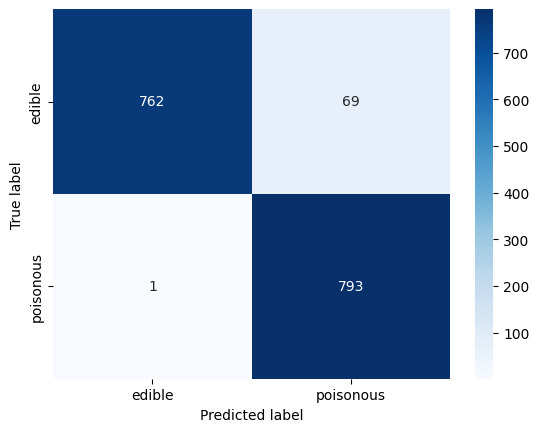

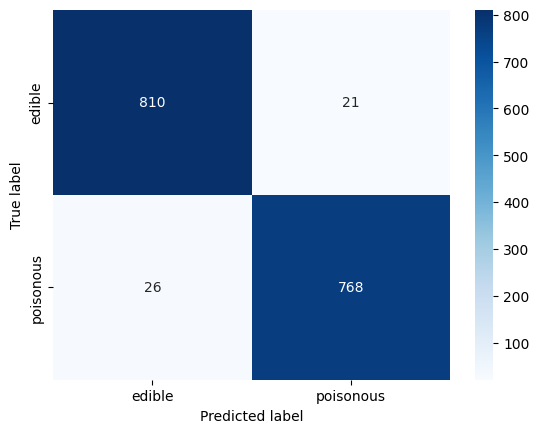

In [914]:
plot_cm(y_test, y_pred_1)
plot_cm(y_test, y_pred_2)

### 2.2.2 Linear Discriminant Analisis

El análisis discriminante lineal (LDA) es un algoritmo clásico de clasificación lineal, y su objetivo es encontrar una combinación lineal de características que maximice la separación entre las dos clases (setas comestibles y venenosas). En otras palabras, el LDA intenta proyectar los datos en un espacio de menor dimensión, preservando al mismo tiempo la mayor discriminación de clases posible.

La etiqueta de clase con la media más cercana en el espacio transformado sería la etiqueta de clase predicha para la muestra de setas.

> a) ¿Qué es lo que asume el modelo LDA sobre la distribución condicional de las clases?

a) `Respuesta`: Asume que todas las clases siguen una distribución gaussiana multivariante, es decir, que las distribuciones condicionales son gaussianas multivariadas.

> b) ¿Qué es lo que asume el modelo LDA sobre las matrices de covarianza de la distribución condicional?

b) `Respuesta`: Asume que cada una de esas distribuciones tiene igual matriz de covarianza.

> c) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

In [915]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_1, y_train)
y_pred_lda_1 = clf.predict(X_test_1)

len(y_pred_lda_1)

clf = LinearDiscriminantAnalysis()
clf.fit(X_train_2, y_train)
y_pred_lda_2 = clf.predict(X_test_2)

len(y_pred_lda_2)

1625

> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [916]:
print(f'Report LDA Accuracy:\n{cla_report(y_test, y_pred_lda_1)}')
print(f'Report LDA Accuracy:\n{cla_report(y_test, y_pred_lda_2)}')

Report LDA Accuracy:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       831
   poisonous       1.00      1.00      1.00       794

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Report LDA Accuracy:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       831
   poisonous       1.00      1.00      1.00       794

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



> e) Muestre los errores tipo 1 y tipo 2.

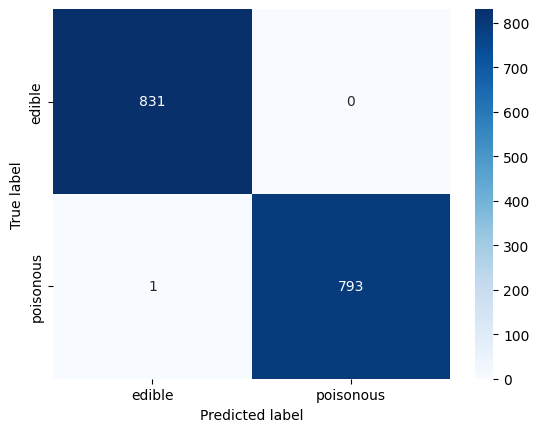

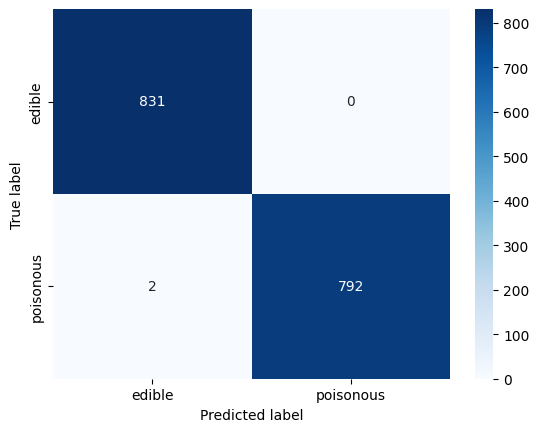

In [917]:
plot_cm(y_test, y_pred_lda_1)
plot_cm(y_test, y_pred_lda_2)

### 2.2.3 Regresión logística

La regresión logística es un modelo discriminativo de clasificación clásico que puede utilizarse para la clasificación de hongos. El objetivo de la regresión logística es encontrar el modelo lineal que mejor se ajuste y que pueda predecir la probabilidad de que cada muestra de hongo pertenezca a una clase determinada (comestible o venenosa).

> a) ¿En qué consiste la estimación de máxima verosimilitud de coeficientes?

a) `Respuesta`: Consiste en encontrar los valores de los coeficientes que maximizan la probabilidad de que los datos observados se ajusten al modelo asumido, es decir, se busca encontrar los valores de los coeficientes que hacen que los datos observados sean más probables según el modelo.

> b) ¿Qué asume este modelo de la relación entre las características y la variable objetivo?

b) `Respuesta`: que su relación es logarítmica

> c) ¿Qué se hace para evitar el sobreajuste de este modelo?

c) `Respuesta`: **Regularización** (penalización a la función costo). **Ajuste del parámetro de regularización**, mientras más grande, se tiende a subajustar. **Validación cruzada**. **Selección de características**.

> d) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

**Nota:** Usted puede variar o probar con distintos hiperparámetros siempre y cuando se utilizen de forma correcta el modelo y los datos para que pueda obtener predicciones comparables con los otros modelos. Puede basarse en los hiperparámetros probados con el regresor logistico y en la documentación de la librería.

In [918]:
clf = LogisticRegression()
clf.fit(X_train_1,y_train)

y_pred_rl_1 = clf.predict(X_test_1)

clf = LogisticRegression()
clf.fit(X_train_2,y_train)

y_pred_rl_2 = clf.predict(X_test_2)

> e) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [919]:
print(f'Report RL Accuracy:\n{cla_report(y_test, y_pred_rl_1)}')
print(f'Report RL Accuracy:\n{cla_report(y_test, y_pred_rl_2)}')

Report RL Accuracy:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       831
   poisonous       1.00      1.00      1.00       794

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Report RL Accuracy:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       831
   poisonous       1.00      1.00      1.00       794

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



> f) Muestre los errores tipo 1 y tipo 2.

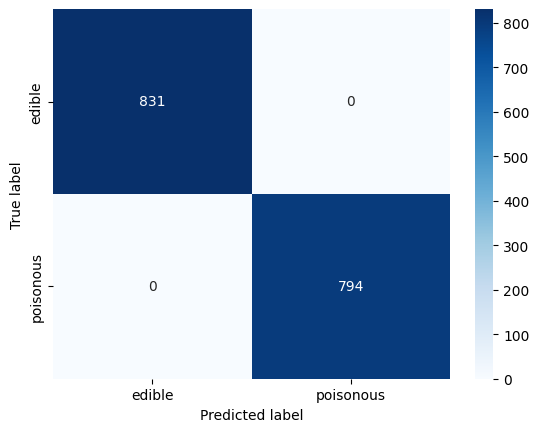

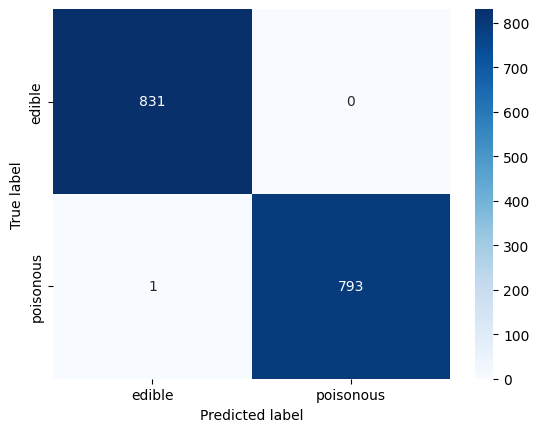

In [920]:
plot_cm(y_test, y_pred_rl_1)
plot_cm(y_test, y_pred_rl_2)

### 2.2.4 Support Vector Machines

Las máquinas de vectores soporte (SVM) son un algoritmo de aprendizaje automático potente y versátil que puede utilizarse para la clasificación de hongos. La idea principal detrás de SVM es encontrar el hiperplano que mejor separa las diferentes clases en el conjunto de datos.

Utilice los datos de entrenamiento para ajustar un modelo SVM a los datos. Esto implica encontrar el hiperplano que maximice el margen entre las muestras positivas y negativas. El margen es la distancia entre el hiperplano y las muestras más cercanas de cada clase.

Si los datos no se pueden separar linealmente, utilice funciones de kernel para transformar los datos en un espacio de mayor dimensión en el que se puedan separar. Las funciones kernel más comunes incluyen funciones polinómicas, de base radial (RBF) y sigmoidales.

Entrene un clasificador SVM con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

Entrene el clasificador con los siguientes tipos de kernel:

a) Lineal, con 2 valores del coeficiente gamma distintos.

b) Polinómico, con 2 valores del coeficiente gamma distintos.

c) rbf, con 2 valores del coeficiente gamma distintos.

In [944]:
def set_gammas(X_train, y_train, approach):
    from sklearn.metrics import make_scorer
    from sklearn.metrics import recall_score, f1_score
    # Definir los parámetros que se quieren probar en la validación cruzada
    param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10]}
    kernels = ['linear', 'poly', 'rbf']
    dic_gammas = {}

    recall_neg = make_scorer(recall_score, pos_label=1)
    f1_neg = make_scorer(f1_score, pos_label=1)
    scoring = [recall_neg, f1_neg]

    for kernel in kernels:
        # Definir el modelo
        clf = NuSVC(kernel=kernel)

        # Definir el objeto GridSearchCV y ajustar los datos
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring=scoring[approach-1])
        grid_search.fit(X_train, y_train)

        print(f'Kernel: {kernel}')

        # Imprimir los resultados de la validación cruzada
        best_gamma = grid_search.best_params_['gamma']
        best_score = grid_search.best_score_
        print("Mejor valor de gamma: ", best_gamma)
        print("Mejor puntaje de validación cruzada: {:.2f}".format(best_score))

        # Encontrar el peor valor de gamma y su puntaje
        worst_gamma = min(grid_search.cv_results_['params'], key=lambda x: grid_search.cv_results_['mean_test_score'][grid_search.cv_results_['params'].index(x)])['gamma']
        worst_score = min(grid_search.cv_results_['mean_test_score'])
        print("Peor valor de gamma: ", worst_gamma)
        print("Peor puntaje de validación cruzada: {:.2f}".format(worst_score))

        dic_gammas[kernel] = [best_gamma, worst_gamma]
        print('-------------------------------------------------------')

    return dic_gammas

print('Approach 1:')
dic_gammas_1 = set_gammas(X_train_1, y_train, 1)

print('Approach 2:')
dic_gammas_2 = set_gammas(X_train_2, y_train, 2)

Approach 1:
Kernel: linear
Mejor valor de gamma:  0.001
Mejor puntaje de validación cruzada: 0.82
Peor valor de gamma:  0.001
Peor puntaje de validación cruzada: 0.82
-------------------------------------------------------
Kernel: poly
Mejor valor de gamma:  0.01
Mejor puntaje de validación cruzada: 0.94
Peor valor de gamma:  0.001
Peor puntaje de validación cruzada: 0.88
-------------------------------------------------------
Kernel: rbf
Mejor valor de gamma:  1
Mejor puntaje de validación cruzada: 1.00
Peor valor de gamma:  10
Peor puntaje de validación cruzada: 0.00
-------------------------------------------------------
Approach 2:
Kernel: linear
Mejor valor de gamma:  0.001
Mejor puntaje de validación cruzada: 0.90
Peor valor de gamma:  0.001
Peor puntaje de validación cruzada: 0.90
-------------------------------------------------------
Kernel: poly
Mejor valor de gamma:  0.01
Mejor puntaje de validación cruzada: 0.98
Peor valor de gamma:  0.001
Peor puntaje de validación cruzada

Hay que agregar why en lineal no mejora :)

In [945]:
def get_y_pred(X_train, y_train, X_test, dic_gammas):
    kernels = ['linear', 'poly', 'rbf']
    y_pred = {}

    for kernel in kernels:
        for gamma in dic_gammas[kernel]:
            clf = NuSVC(kernel=kernel, gamma = gamma)
            clf.fit(X_train, y_train)

            if kernel not in y_pred:
                y_pred[kernel] = []

            y_pred[kernel].append(clf.predict(X_test))
    return y_pred

y_pred_1 = get_y_pred(X_train_1, y_train, X_test_1, dic_gammas_1)
y_pred_2 = get_y_pred(X_train_2, y_train, X_test_2, dic_gammas_2)

> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [946]:
for y_predicted in y_pred_1['linear']:
    print(cla_report(y_test, y_predicted))
for y_predicted in y_pred_2['linear']:
    print(cla_report(y_test, y_predicted))

              precision    recall  f1-score   support

      edible       0.86      1.00      0.93       831
   poisonous       1.00      0.83      0.91       794

    accuracy                           0.92      1625
   macro avg       0.93      0.92      0.92      1625
weighted avg       0.93      0.92      0.92      1625

              precision    recall  f1-score   support

      edible       0.86      1.00      0.93       831
   poisonous       1.00      0.83      0.91       794

    accuracy                           0.92      1625
   macro avg       0.93      0.92      0.92      1625
weighted avg       0.93      0.92      0.92      1625

              precision    recall  f1-score   support

      edible       0.85      1.00      0.92       831
   poisonous       1.00      0.82      0.90       794

    accuracy                           0.91      1625
   macro avg       0.92      0.91      0.91      1625
weighted avg       0.92      0.91      0.91      1625

              preci

In [947]:
for y_predicted in y_pred_1['poly']:
    print(cla_report(y_test, y_predicted)) 
for y_predicted in y_pred_2['poly']:
    print(cla_report(y_test, y_predicted)) 

              precision    recall  f1-score   support

      edible       0.95      1.00      0.97       831
   poisonous       1.00      0.95      0.97       794

    accuracy                           0.97      1625
   macro avg       0.98      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

              precision    recall  f1-score   support

      edible       0.83      1.00      0.91       831
   poisonous       1.00      0.78      0.88       794

    accuracy                           0.89      1625
   macro avg       0.91      0.89      0.89      1625
weighted avg       0.91      0.89      0.89      1625

              precision    recall  f1-score   support

      edible       0.97      1.00      0.98       831
   poisonous       0.99      0.97      0.98       794

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

              preci

In [948]:
for y_predicted in y_pred_1['rbf']:
    print(classification_report(y_test, y_predicted))
for y_predicted in y_pred_2['rbf']:
    print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       831
           1       1.00      1.00      1.00       794

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       831
           1       0.00      0.00      0.00       794

    accuracy                           0.51      1625
   macro avg       0.26      0.50      0.34      1625
weighted avg       0.26      0.51      0.35      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       831
           1       1.00      1.00      1.00       794

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              preci

c:\Users\dyess\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dyess\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dyess\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

> e) Muestre los errores tipo 1 y tipo 2.

Mostraremos los errores tipo 1 y 2 de los mejores parámetros de cada kernel.

LINEAR


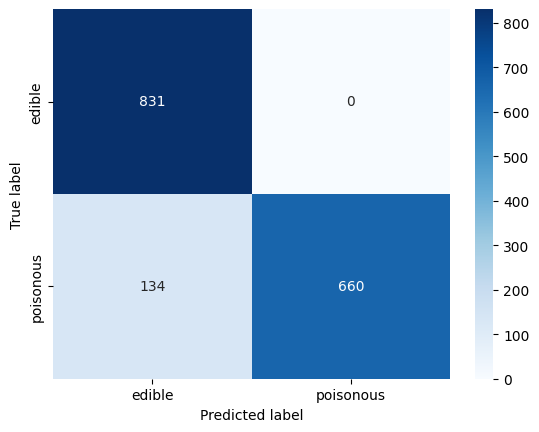

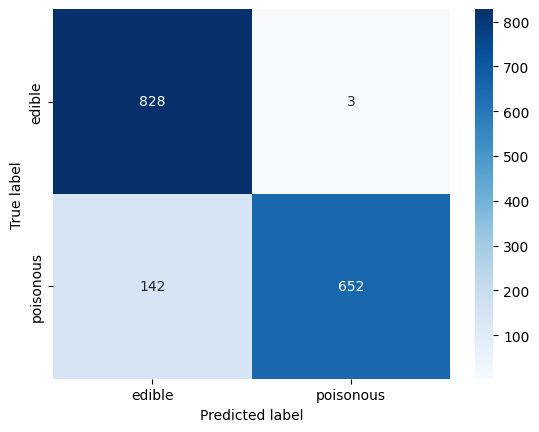

----------------------------------------------------------------------
POLY


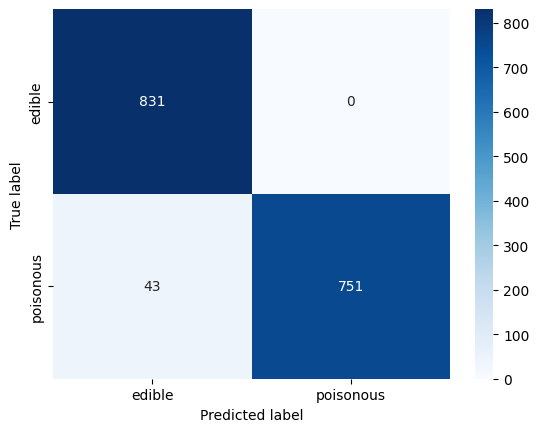

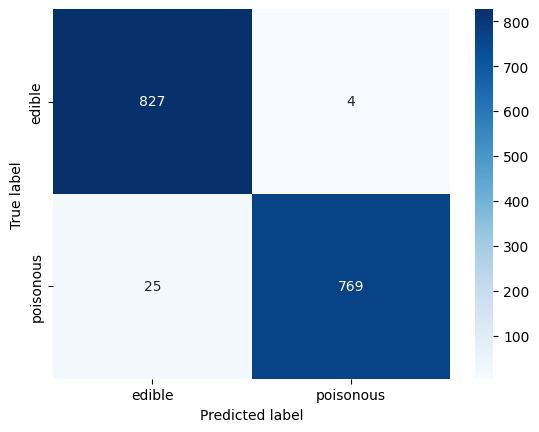

----------------------------------------------------------------------
RBF


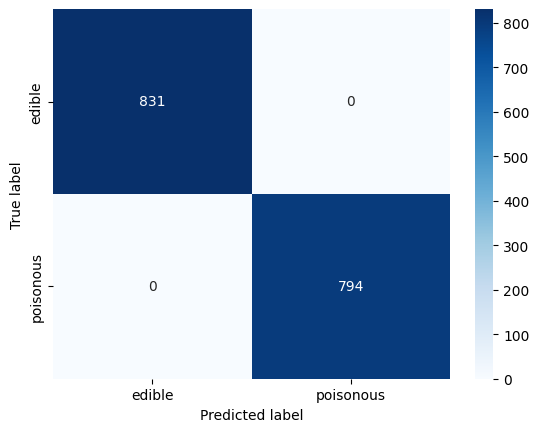

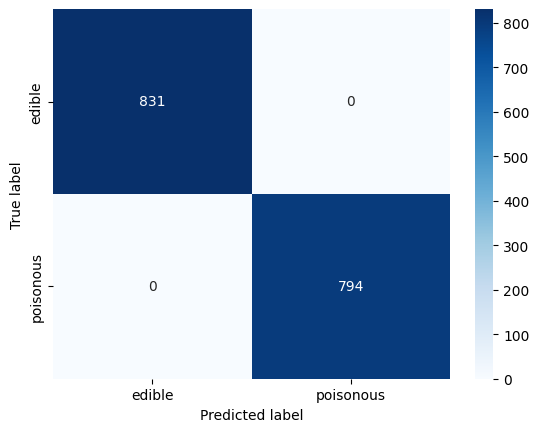

----------------------------------------------------------------------


In [959]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    print(f'{kernel.upper()}')
    plot_cm(y_test, y_pred_1[kernel][0])
    plot_cm(y_test, y_pred_2[kernel][0])
    print('----------------------------------------------------------------------')

Ahora vemos los errores tipo 1 y 2 de los peores parámetros de cada kernel.

LINEAR


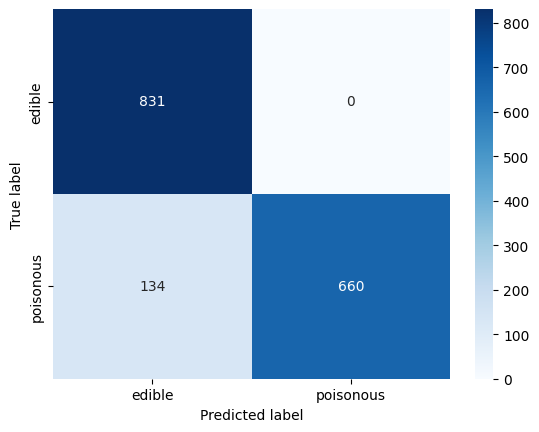

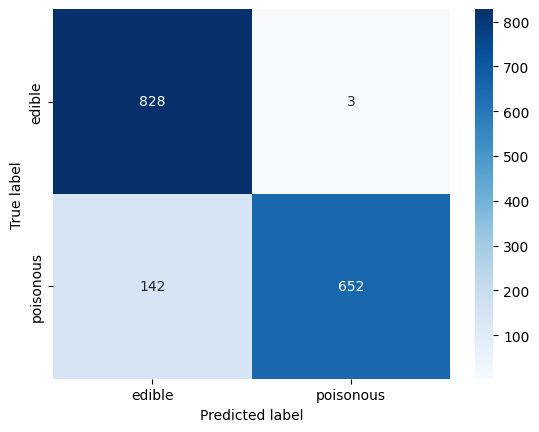

----------------------------------------------------------------------
POLY


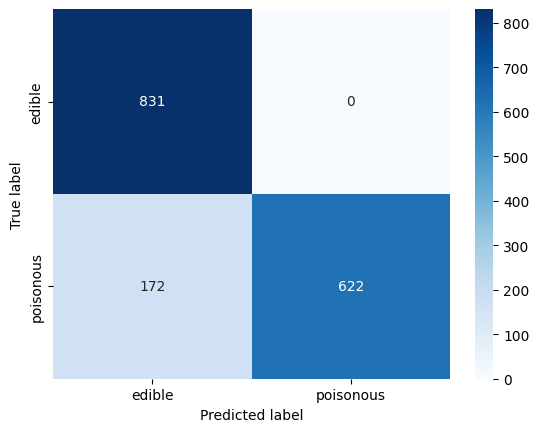

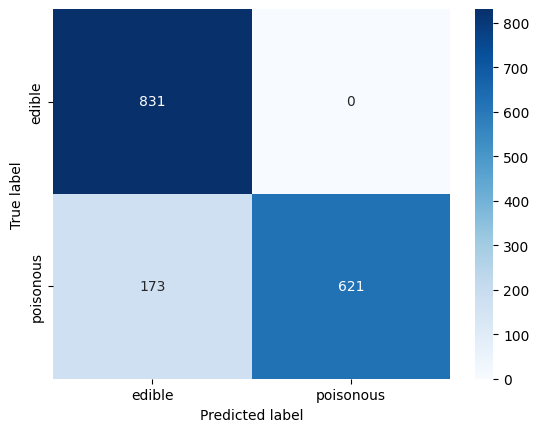

----------------------------------------------------------------------
RBF


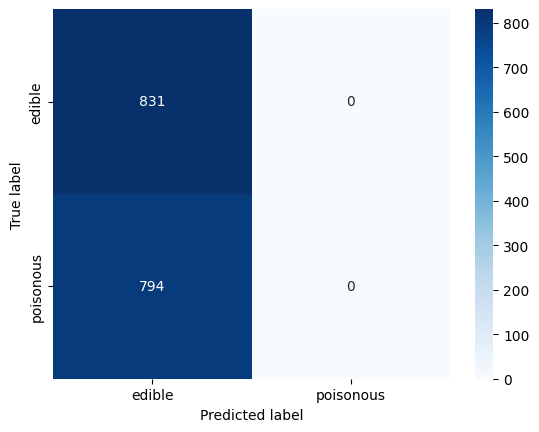

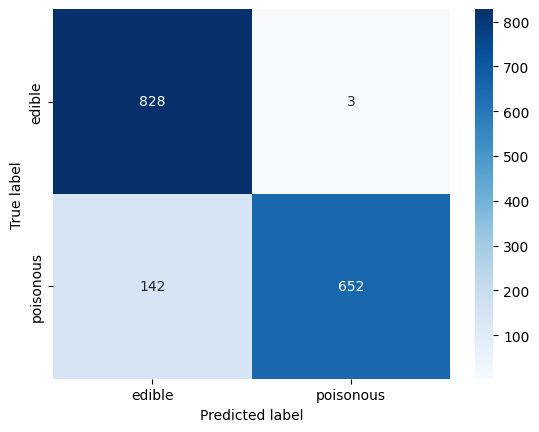

----------------------------------------------------------------------


In [958]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    print(f'{kernel.upper()}')
    plot_cm(y_test, y_pred_1[kernel][1])
    plot_cm(y_test, y_pred_2[kernel][1])
    print('----------------------------------------------------------------------')

## 2.3 Conclusiones:

(Escriba aquí sus conclusiones de la pregunta 2: Clasificación de hongos)

felicidades llegaste al final owo WUJUUU